In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

In [44]:

def spiral_regression_data(n_samples, seed=None):
    if seed is not None:
        np.random.seed(seed)
    
    theta = 2 * np.pi * np.linspace(0, 1, n_samples)
    r = 5 * theta
    X = np.column_stack((r * np.cos(theta), r * np.sin(theta)))
    y = r  # The target variable is the radius (r)
    
    return X, y

In [77]:
def plot_spiral_data(X_train, y_train, X_test=None, y_test=None, predictions=None):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
    
    # First subplot: Spiral data with actual and predicted values
    train_scatter = ax1.scatter(X_train[:, 0], X_train[:, 1], 
                              c=y_train, cmap='viridis', 
                              s=50, label='Training Data')
    fig.colorbar(train_scatter, ax=ax1, label='Radius (y value)')
    
    if X_test is not None and y_test is not None:
        test_scatter = ax1.scatter(X_test[:, 0], X_test[:, 1],
                                 c=y_test, cmap='viridis',
                                 marker='s', s=50, label='Test Data (True)',
                                 alpha=0.6)
    
    if predictions is not None and X_test is not None:
        pred_scatter = ax1.scatter(X_test[:, 0], X_test[:, 1],
                                 c=predictions, cmap='viridis',
                                 marker='^', s=50, label='Predictions',
                                 alpha=0.6)
    
    ax1.set_xlabel('X₁')
    ax1.set_ylabel('X₂')
    ax1.set_title('Spiral Data with Predictions')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    ax1.axis('equal')
    
    # Second subplot: Error visualization
    if predictions is not None and y_test is not None:
        errors = predictions - y_test
        
        # Create error scatter plot
        error_scatter = ax2.scatter(X_test[:, 0], X_test[:, 1],
                                  c=errors, cmap='RdBu', 
                                  s=100, marker='o',
                                  vmin=-max(abs(errors)), vmax=max(abs(errors)))
        
        error_colorbar = fig.colorbar(error_scatter, ax=ax2, label='Prediction Error')
        
        # Add error statistics as text
        mae = np.mean(np.abs(errors))
        rmse = np.sqrt(np.mean(errors**2))
        max_error = np.max(np.abs(errors))
        
        stats_text = f'MAE: {mae:.2f}\nRMSE: {rmse:.2f}\nMax Error: {max_error:.2f}'
        ax2.text(0.05, 0.95, stats_text,
                transform=ax2.transAxes,
                verticalalignment='top',
                bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
        
        ax2.set_xlabel('X₁')
        ax2.set_ylabel('X₂')
        ax2.set_title('Prediction Errors')
        ax2.grid(True, alpha=0.3)
        ax2.axis('equal')
    else:
        ax2.text(0.5, 0.5, 'No predictions available\nto compute errors',
                ha='center', va='center')
        ax2.set_title('Prediction Errors (N/A)')
    
    plt.tight_layout()
    return fig, (ax1, ax2)

In [78]:
def plot_spiral_errors(X_test, y_test, predictions):
    errors = predictions - y_test
    abs_errors = np.abs(errors)
    
    # Create a figure with four subplots
    fig = plt.figure(figsize=(20, 16))
    
    # 1. 3D visualization with true vs predicted values
    ax1 = fig.add_subplot(221, projection='3d')
    scatter1 = ax1.scatter(X_test[:, 0], X_test[:, 1], y_test, 
                          c='blue', label='True Values', alpha=0.6)
    scatter2 = ax1.scatter(X_test[:, 0], X_test[:, 1], predictions, 
                          c='red', label='Predictions', alpha=0.6)
    ax1.set_xlabel('X₁')
    ax1.set_ylabel('X₂')
    ax1.set_zlabel('Radius')
    ax1.set_title('True vs Predicted Values in 3D')
    ax1.legend()
    
    # 2. Error magnitude with distance from origin
    ax2 = fig.add_subplot(222)
    distances = np.sqrt(X_test[:, 0]**2 + X_test[:, 1]**2)
    scatter3 = ax2.scatter(distances, abs_errors, 
                          c=errors, cmap='RdBu', alpha=0.6)
    ax2.set_xlabel('Distance from Origin')
    ax2.set_ylabel('Absolute Error')
    ax2.set_title('Error Magnitude vs Distance from Origin')
    plt.colorbar(scatter3, ax=ax2, label='Error (Predicted - True)')
    
    # 3. Polar plot of errors
    ax3 = fig.add_subplot(223, projection='polar')
    angles = np.arctan2(X_test[:, 1], X_test[:, 0])
    scatter4 = ax3.scatter(angles, distances, 
                          c=errors, cmap='RdBu', alpha=0.6)
    ax3.set_title('Errors in Polar Coordinates')
    plt.colorbar(scatter4, ax=ax3, label='Error (Predicted - True)')
    
    # 4. Error distribution and statistics
    ax4 = fig.add_subplot(224)
    ax4.hist(errors, bins=50, color='skyblue', alpha=0.6)
    ax4.set_xlabel('Error Value')
    ax4.set_ylabel('Frequency')
    ax4.set_title('Error Distribution')
    
    # Add error statistics
    mae = np.mean(np.abs(errors))
    rmse = np.sqrt(np.mean(errors**2))
    max_error = np.max(np.abs(errors))
    std_error = np.std(errors)
    
    stats_text = (f'Error Statistics:\n'
                 f'MAE: {mae:.2f}\n'
                 f'RMSE: {rmse:.2f}\n'
                 f'Max Error: {max_error:.2f}\n'
                 f'Std Dev: {std_error:.2f}\n'
                 f'Error Range: [{errors.min():.2f}, {errors.max():.2f}]')
    
    ax4.text(0.95, 0.95, stats_text,
             transform=ax4.transAxes,
             verticalalignment='top',
             horizontalalignment='right',
             bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    
    plt.tight_layout()
    return fig, (ax1, ax2, ax3, ax4)

In [54]:
from sklearn.metrics import (
    mean_squared_error,
    mean_absolute_error,
    r2_score,
    explained_variance_score,
    max_error,
    mean_absolute_percentage_error
)

In [55]:
def evaluate_regression(y_true, y_pred, model_name="Model"):
    metrics = {
        'R² Score': r2_score(y_true, y_pred),
        'Adjusted R²': 1 - (1 - r2_score(y_true, y_pred)) * (len(y_true) - 1) / (len(y_true) - y_pred.shape[1] - 1) if hasattr(y_pred, 'shape') and len(y_pred.shape) > 1 else None,
        'Explained Variance': explained_variance_score(y_true, y_pred),
        'MAE': mean_absolute_error(y_true, y_pred),
        'MSE': mean_squared_error(y_true, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_true, y_pred)),
        'MAPE': mean_absolute_percentage_error(y_true, y_pred),
        'Max Error': max_error(y_true, y_pred)
    }
    
    # Print formatted results
    print(f"\nPerformance Metrics for {model_name}:")
    print("-" * 50)
    print(f"R² Score: {metrics['R² Score']:.4f}")
    if metrics['Adjusted R²']:
        print(f"Adjusted R²: {metrics['Adjusted R²']:.4f}")
    print(f"Explained Variance: {metrics['Explained Variance']:.4f}")
    print(f"Mean Absolute Error: {metrics['MAE']:.4f}")
    print(f"Mean Squared Error: {metrics['MSE']:.4f}")
    print(f"Root Mean Squared Error: {metrics['RMSE']:.4f}")
    print(f"Mean Absolute Percentage Error: {metrics['MAPE']:.4f}")
    print(f"Maximum Error: {metrics['Max Error']:.4f}")

(<Figure size 2000x800 with 3 Axes>,
 (<Axes: title={'center': 'Spiral Data with Predictions'}, xlabel='X₁', ylabel='X₂'>,
  <Axes: title={'center': 'Prediction Errors (N/A)'}>))

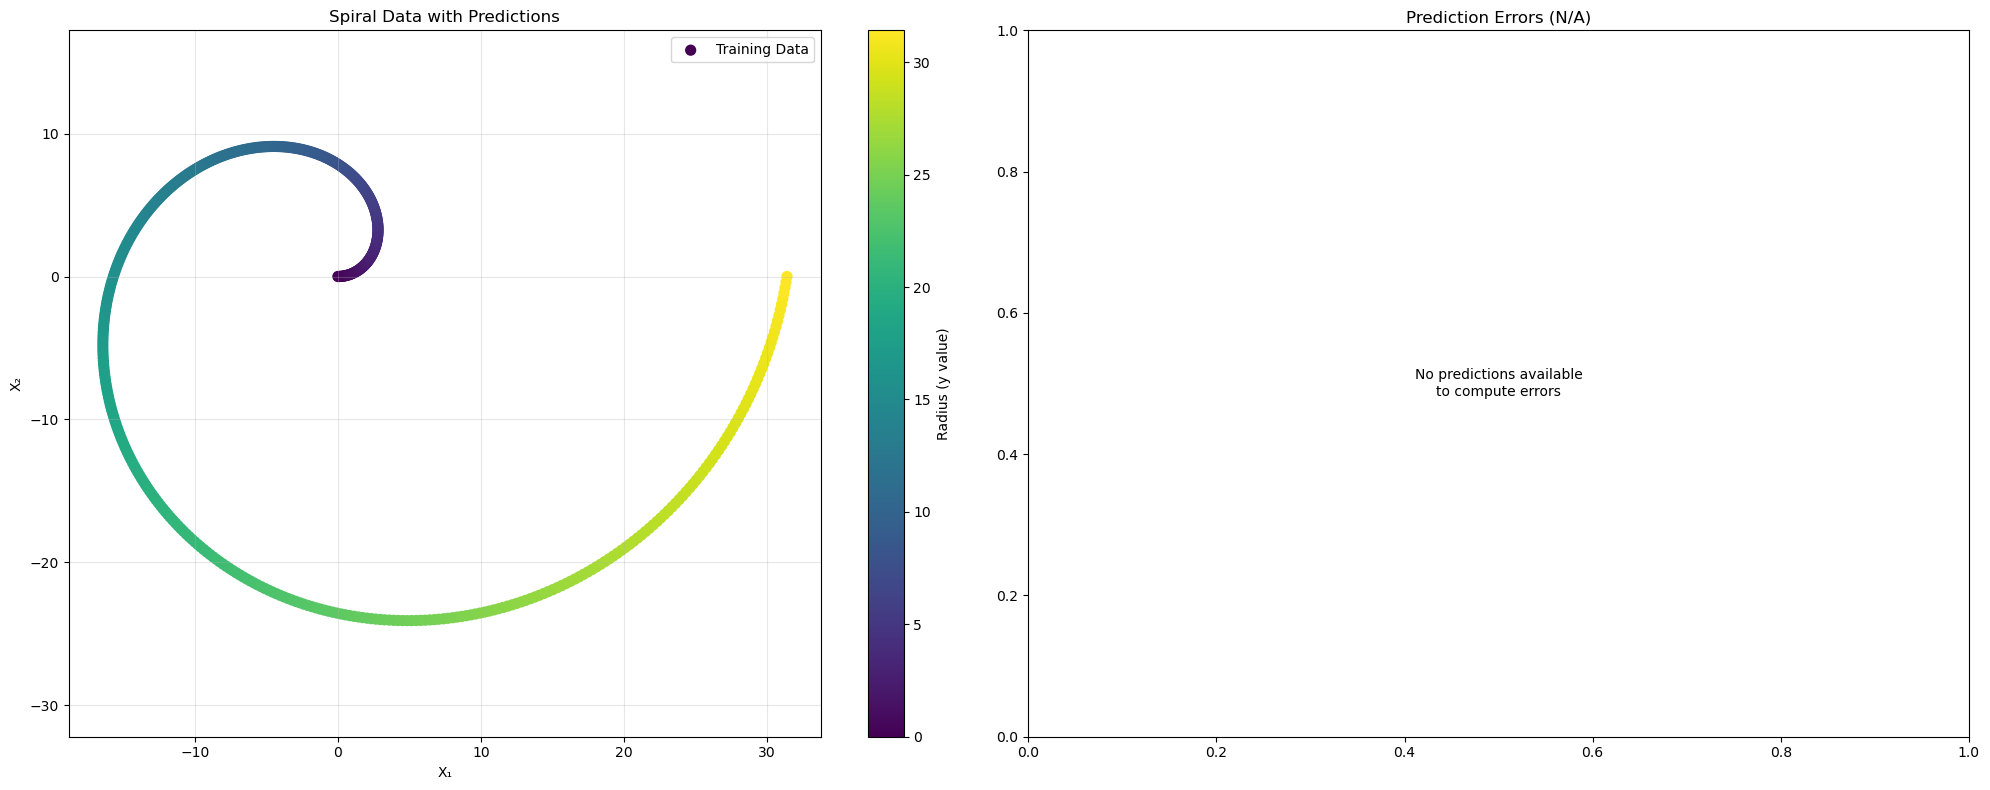

In [47]:
X, y = spiral_regression_data(n_samples=500, seed=42)

plot_spiral_data(X, y)

In [48]:
X.shape

(500, 2)

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (400, 2)
X_test shape: (100, 2)
y_train shape: (400,)
y_test shape: (100,)


## Algorithms
### KNN

In [50]:
from sklearn.neighbors import KNeighborsRegressor

In [51]:
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)

KNeighborsRegressor()

(<Figure size 2000x800 with 4 Axes>,
 (<Axes: title={'center': 'Spiral Data with Predictions'}, xlabel='X₁', ylabel='X₂'>,
  <Axes: title={'center': 'Prediction Errors'}, xlabel='X₁', ylabel='X₂'>))

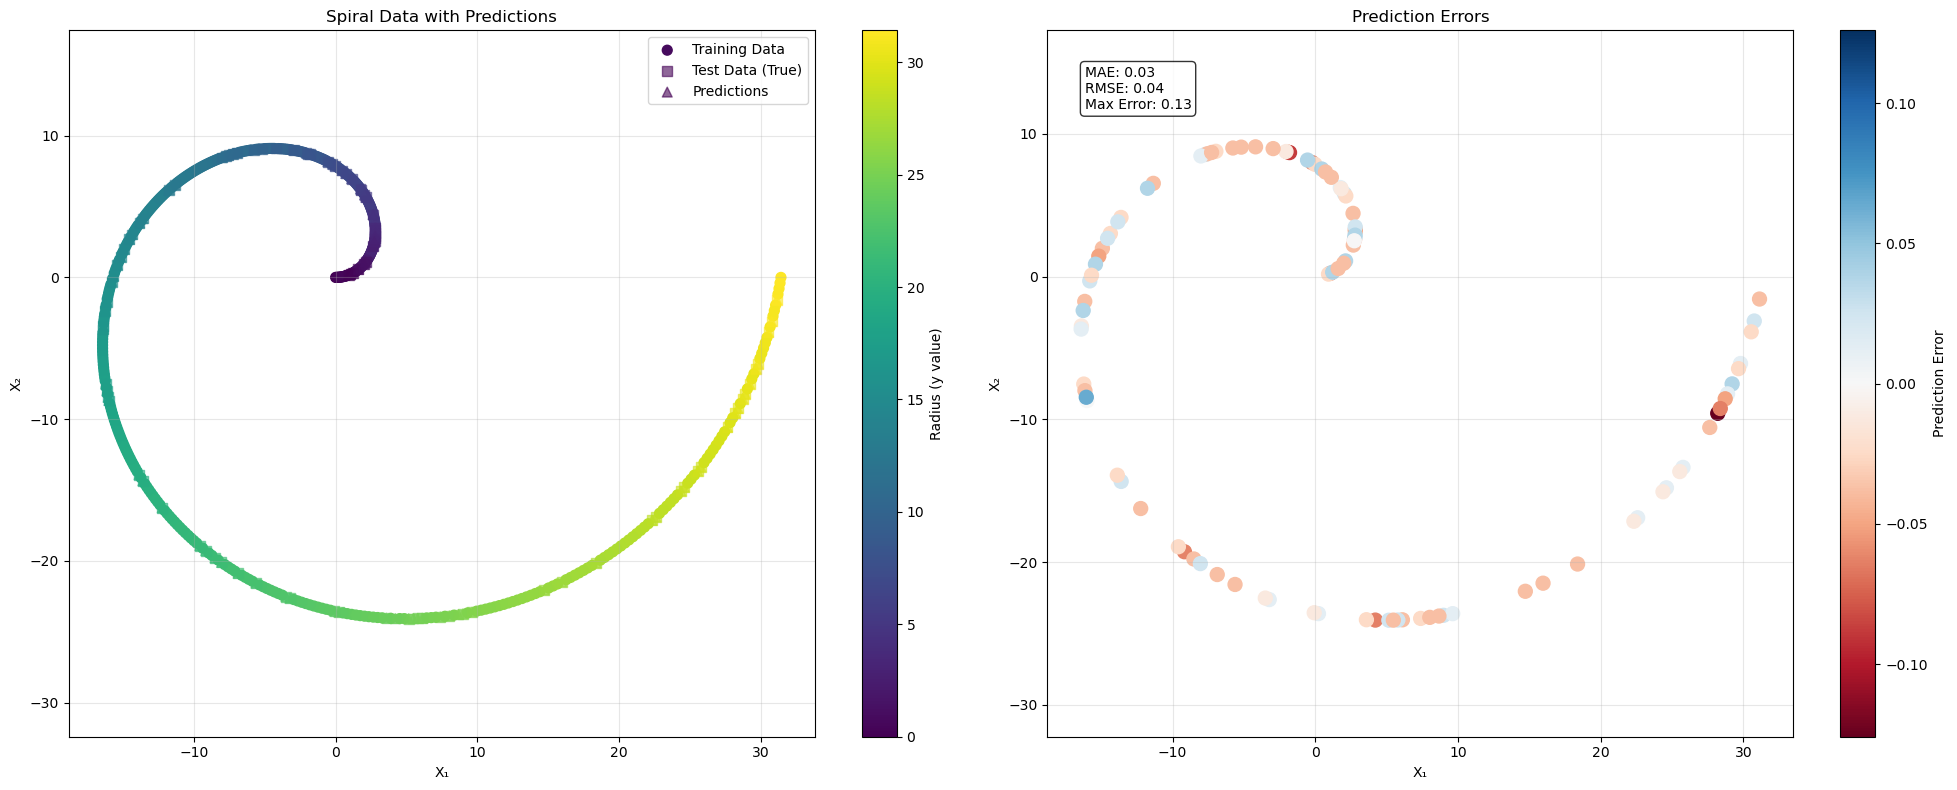

In [52]:
y_pred = knn.predict(X_test)
plot_spiral_data(X_train, y_train, X_test, y_test, y_pred)

(<Figure size 2000x1600 with 6 Axes>,
 (<Axes3D: title={'center': 'True vs Predicted Values in 3D'}, xlabel='X₁', ylabel='X₂', zlabel='Radius'>,
  <Axes: title={'center': 'Error Magnitude vs Distance from Origin'}, xlabel='Distance from Origin', ylabel='Absolute Error'>,
  <PolarAxes: title={'center': 'Errors in Polar Coordinates'}>,
  <Axes: title={'center': 'Error Distribution'}, xlabel='Error Value', ylabel='Frequency'>))

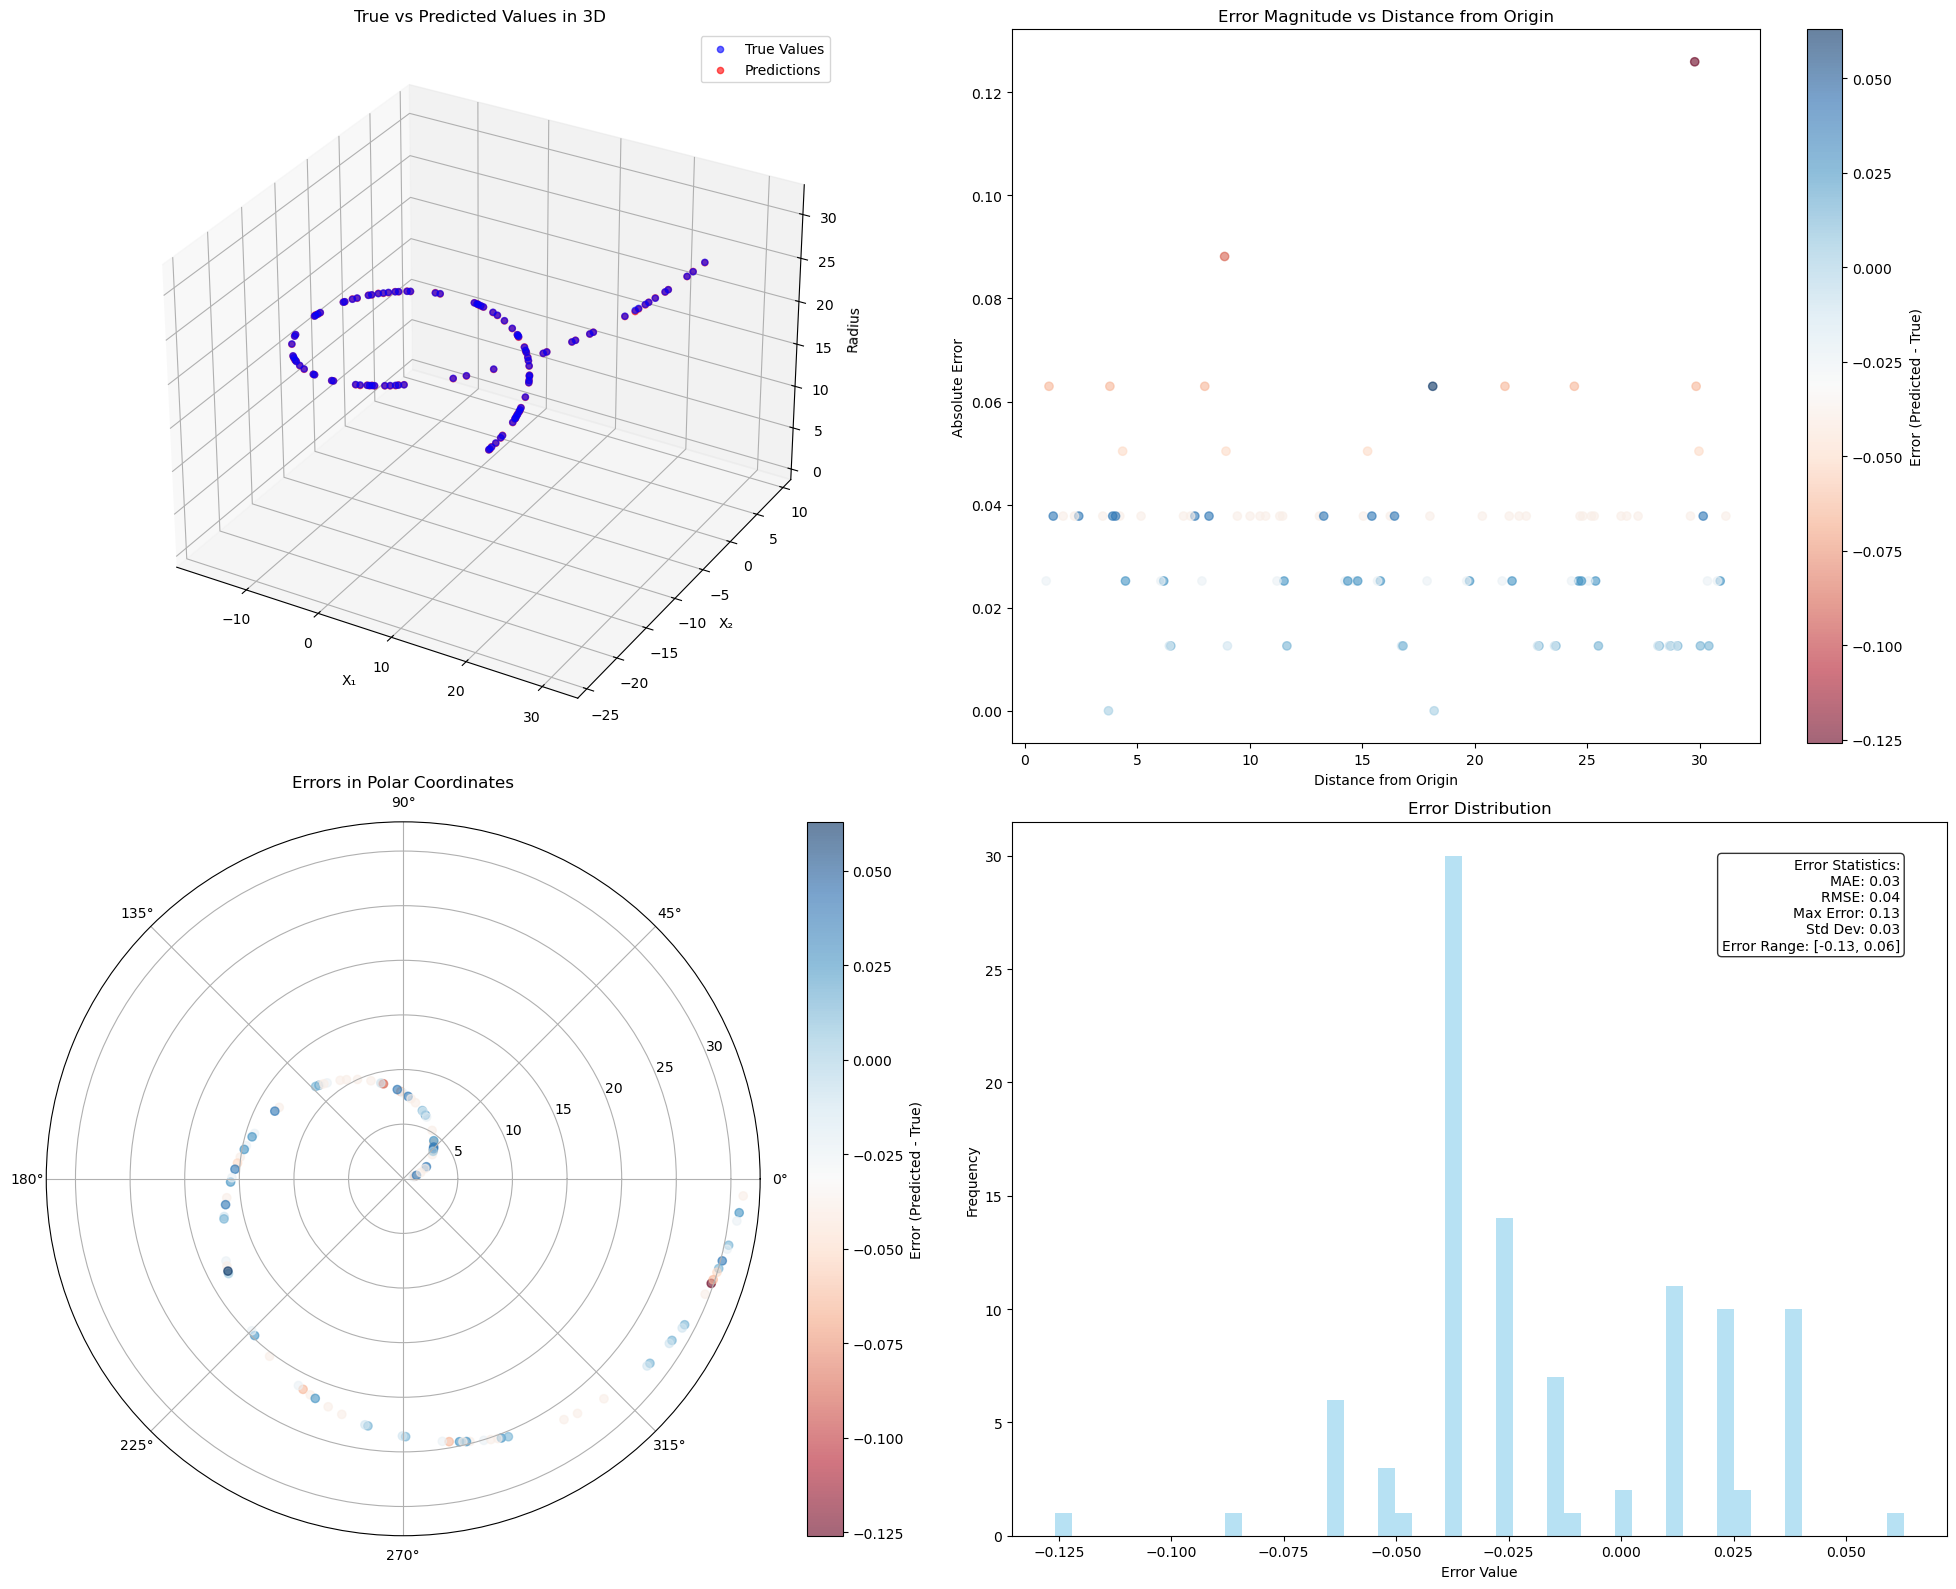

In [53]:
plot_spiral_errors(X_test, y_test, y_pred)

In [57]:
evaluate_regression(y_test, y_pred, "knn")


Performance Metrics for knn:
--------------------------------------------------
R² Score: 1.0000
Explained Variance: 1.0000
Mean Absolute Error: 0.0326
Mean Squared Error: 0.0014
Root Mean Squared Error: 0.0372
Mean Absolute Percentage Error: 0.0043
Maximum Error: 0.1259


### Linear Regression

In [60]:
from sklearn.linear_model import LinearRegression


Performance Metrics for lr:
--------------------------------------------------
R² Score: 0.6412
Explained Variance: 0.6463
Mean Absolute Error: 4.4961
Mean Squared Error: 30.6875
Root Mean Squared Error: 5.5396
Mean Absolute Percentage Error: 0.8358
Maximum Error: 12.7398


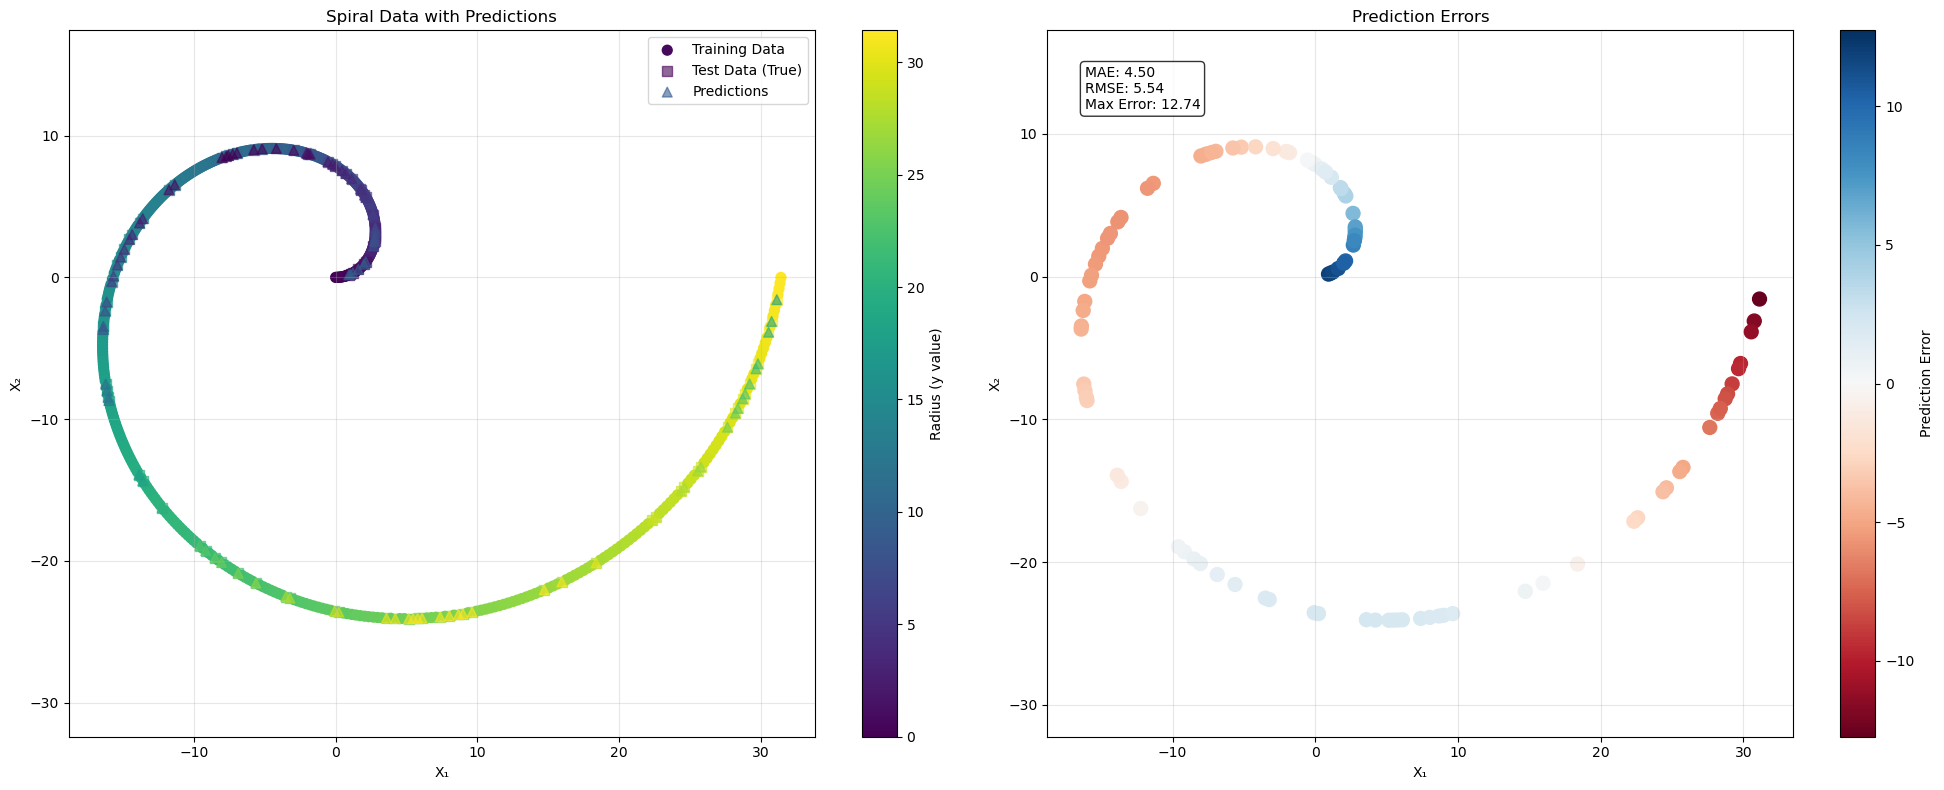

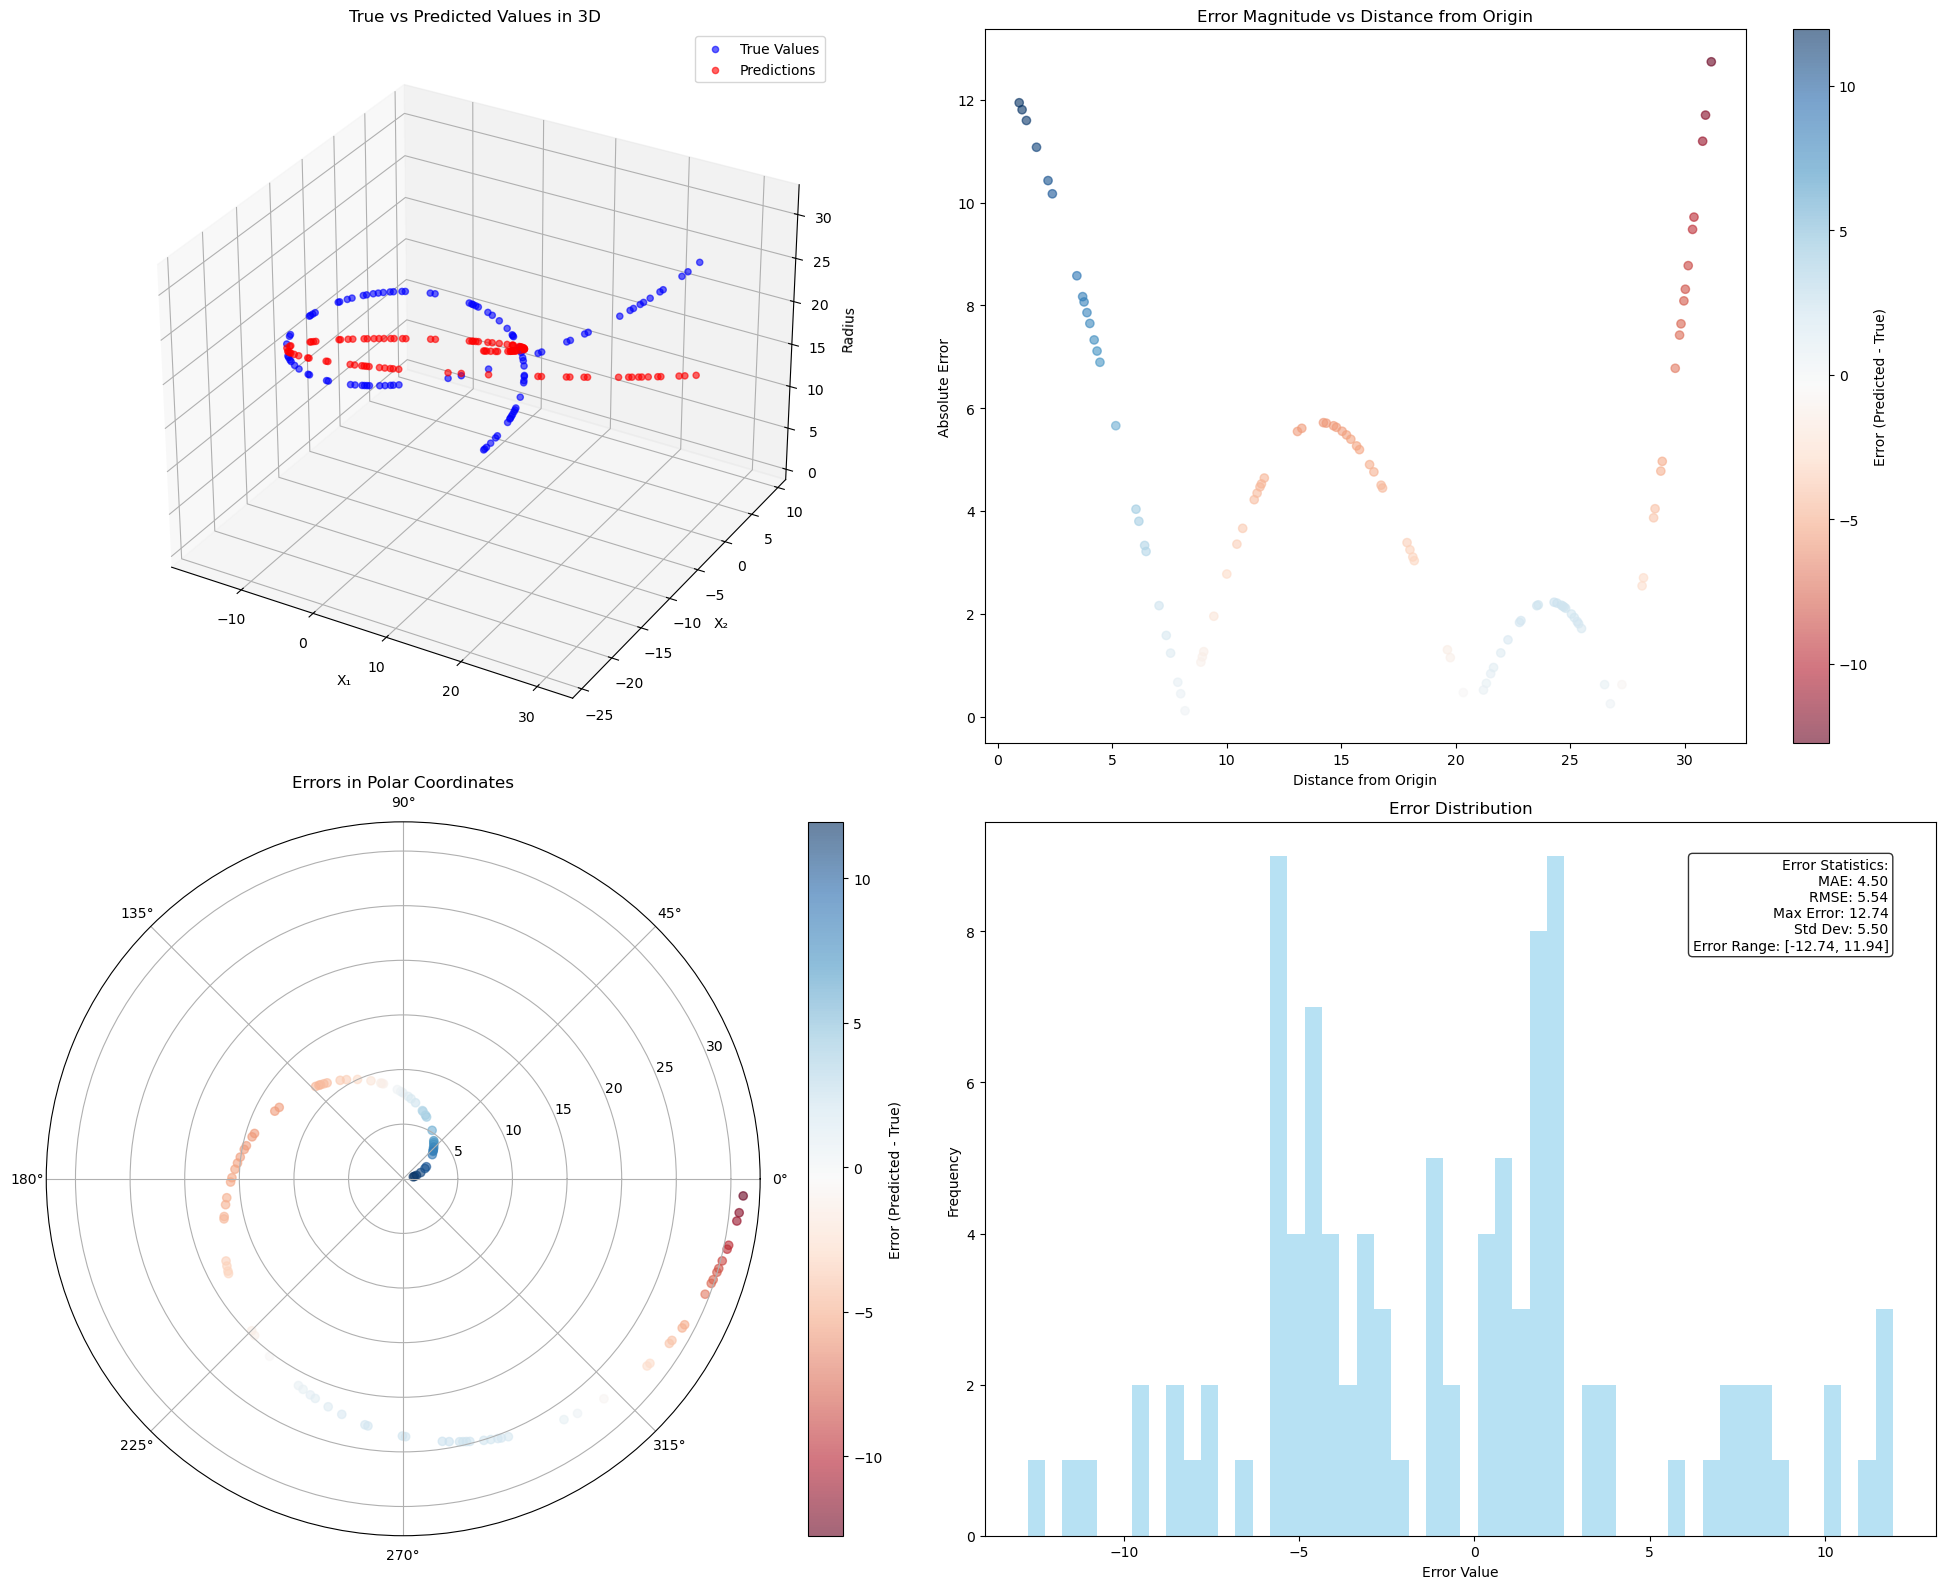

In [66]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
plot_spiral_data(X_train, y_train, X_test, y_test, y_pred)
plot_spiral_errors(X_test, y_test, y_pred)
evaluate_regression(y_test, y_pred, "lr")

### Ridge

In [65]:
from sklearn.linear_model import Ridge


Performance Metrics for red:
--------------------------------------------------
R² Score: 0.6412
Explained Variance: 0.6463
Mean Absolute Error: 4.4960
Mean Squared Error: 30.6875
Root Mean Squared Error: 5.5396
Mean Absolute Percentage Error: 0.8358
Maximum Error: 12.7397


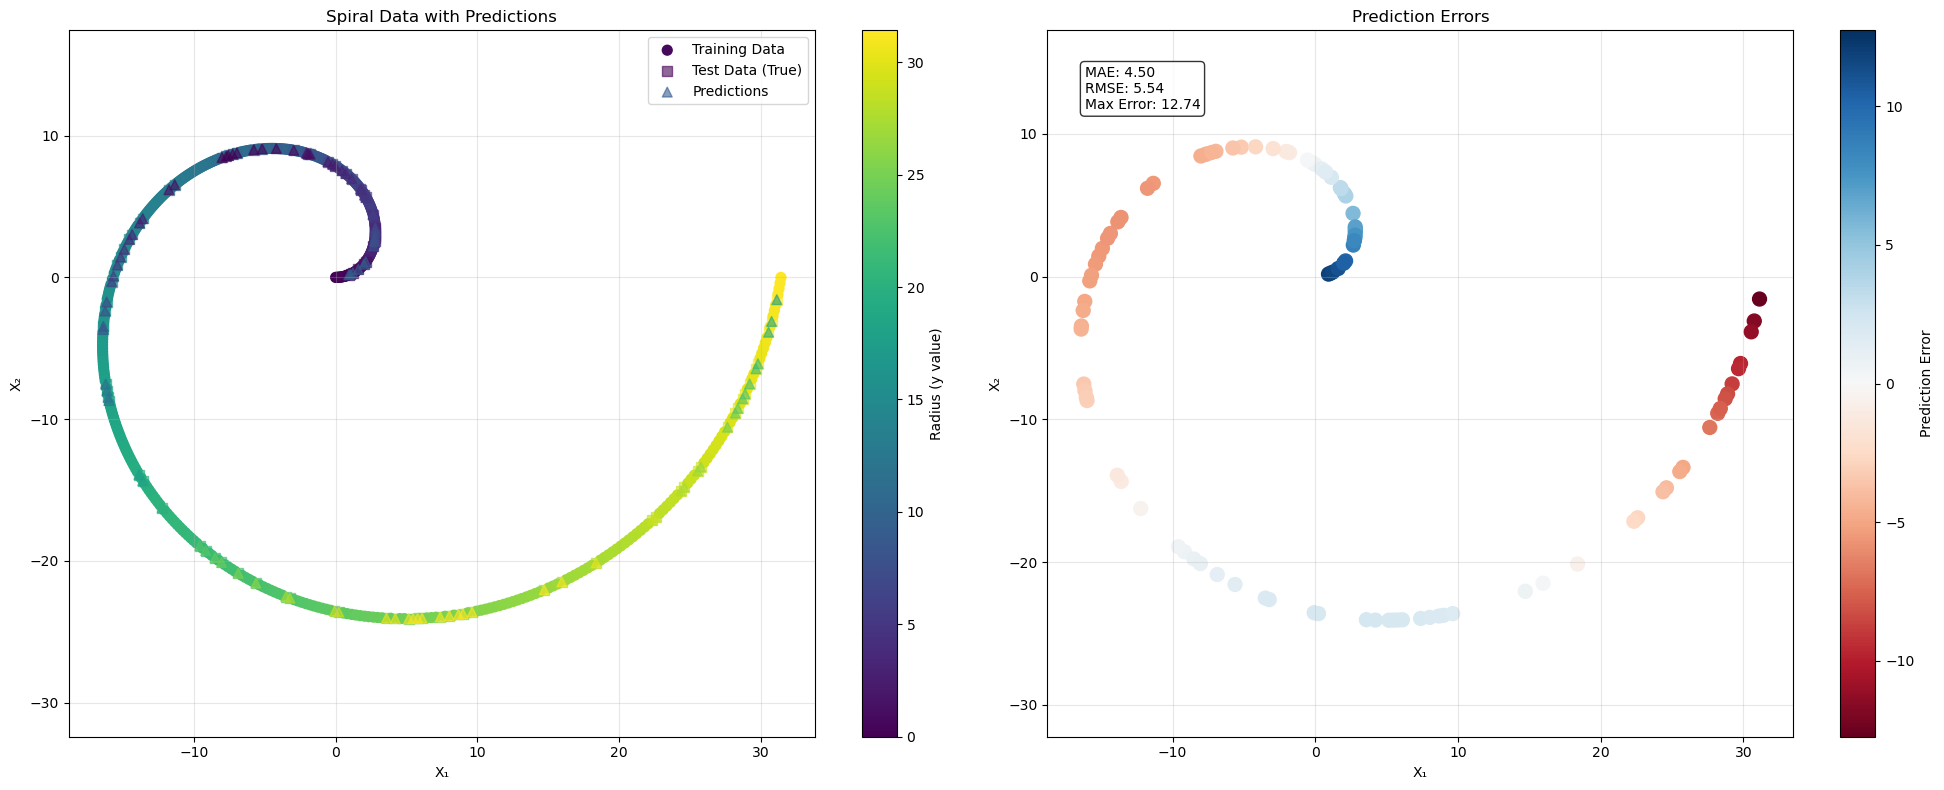

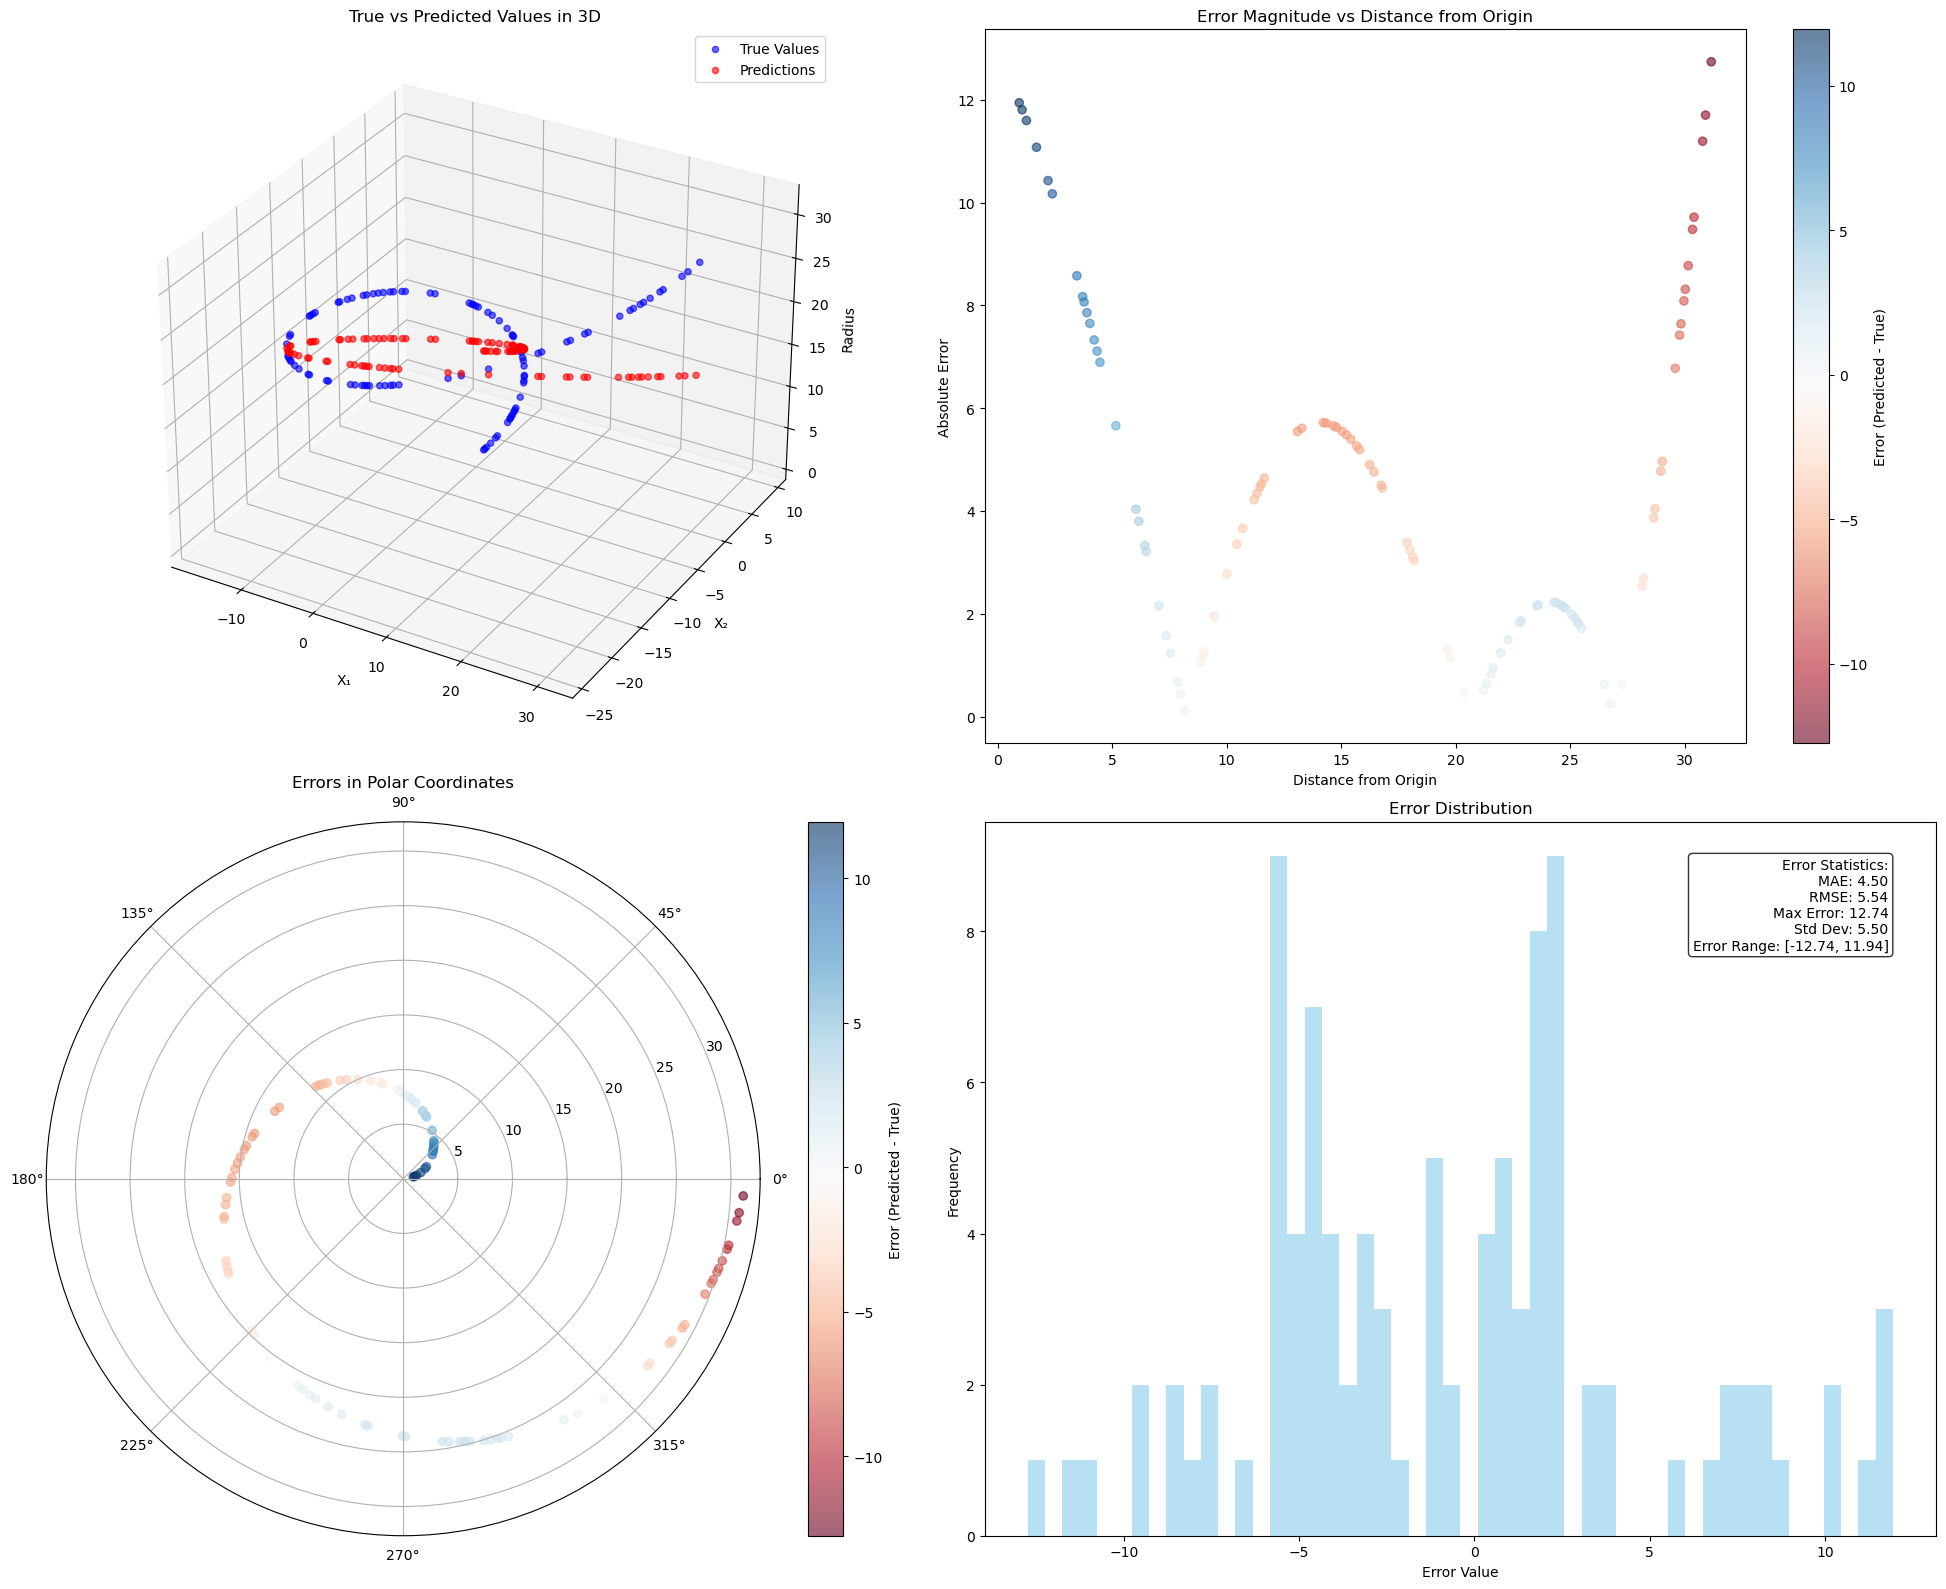

In [67]:
red = Ridge(alpha=0.5)
red.fit(X_train, y_train)
y_pred = red.predict(X_test)
plot_spiral_data(X_train, y_train, X_test, y_test, y_pred)
plot_spiral_errors(X_test, y_test, y_pred)
evaluate_regression(y_test, y_pred, "red")

### SVM

In [68]:
from sklearn.svm import SVR


Performance Metrics for svr:
--------------------------------------------------
R² Score: 0.9993
Explained Variance: 0.9993
Mean Absolute Error: 0.1368
Mean Squared Error: 0.0632
Root Mean Squared Error: 0.2513
Mean Absolute Percentage Error: 0.0472
Maximum Error: 1.2858


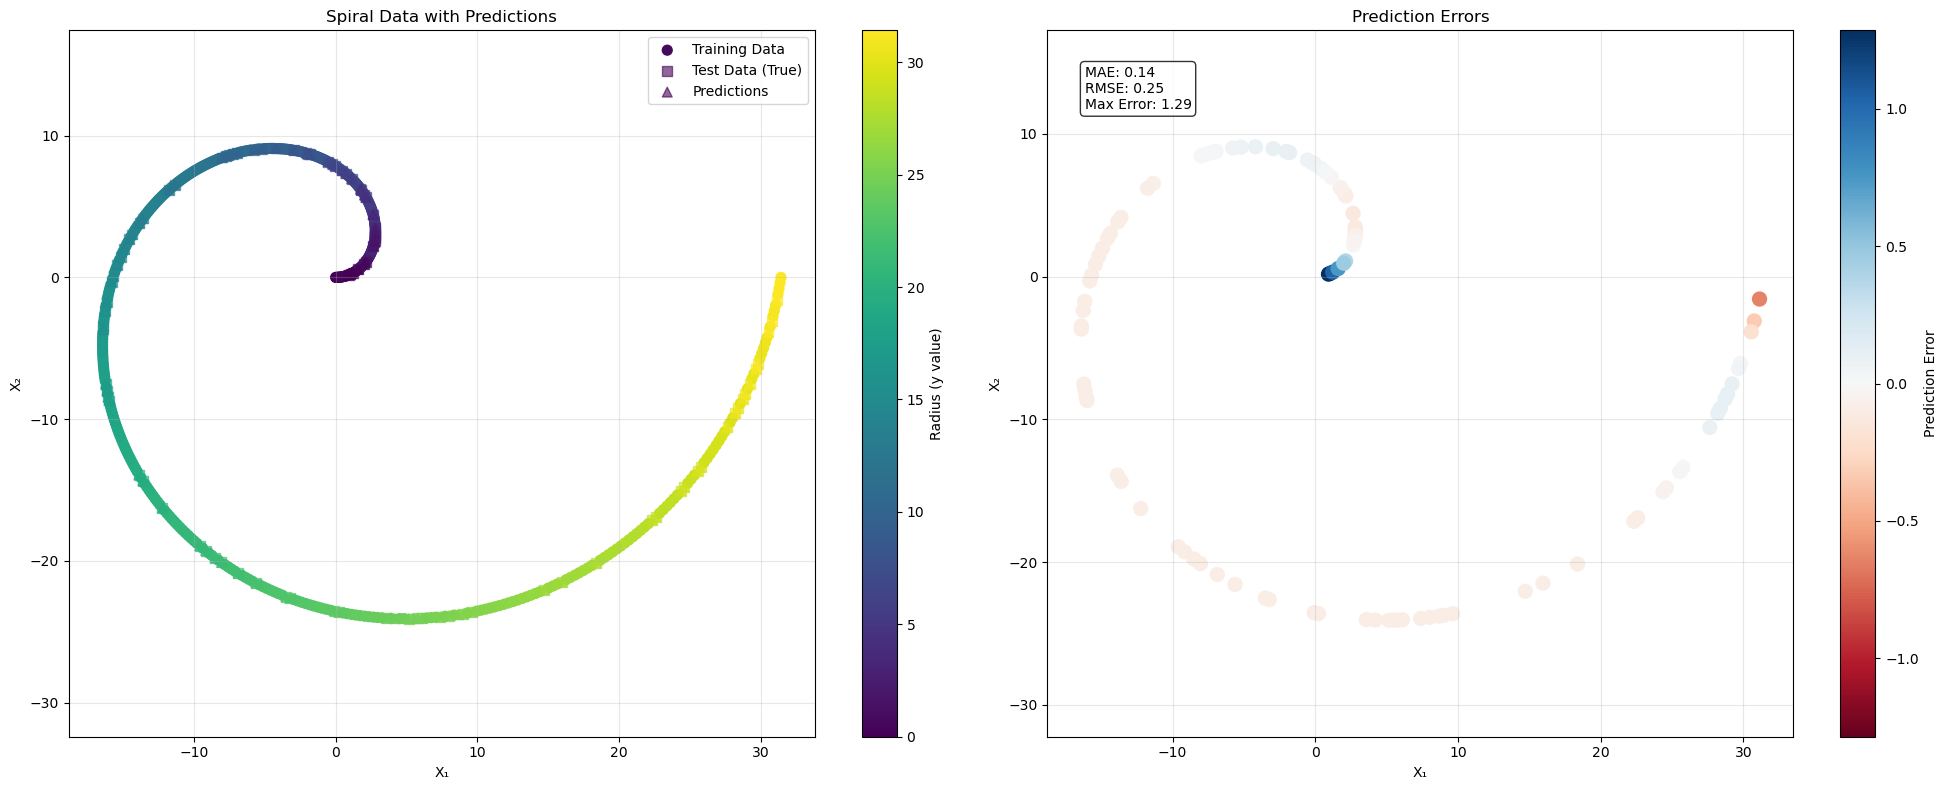

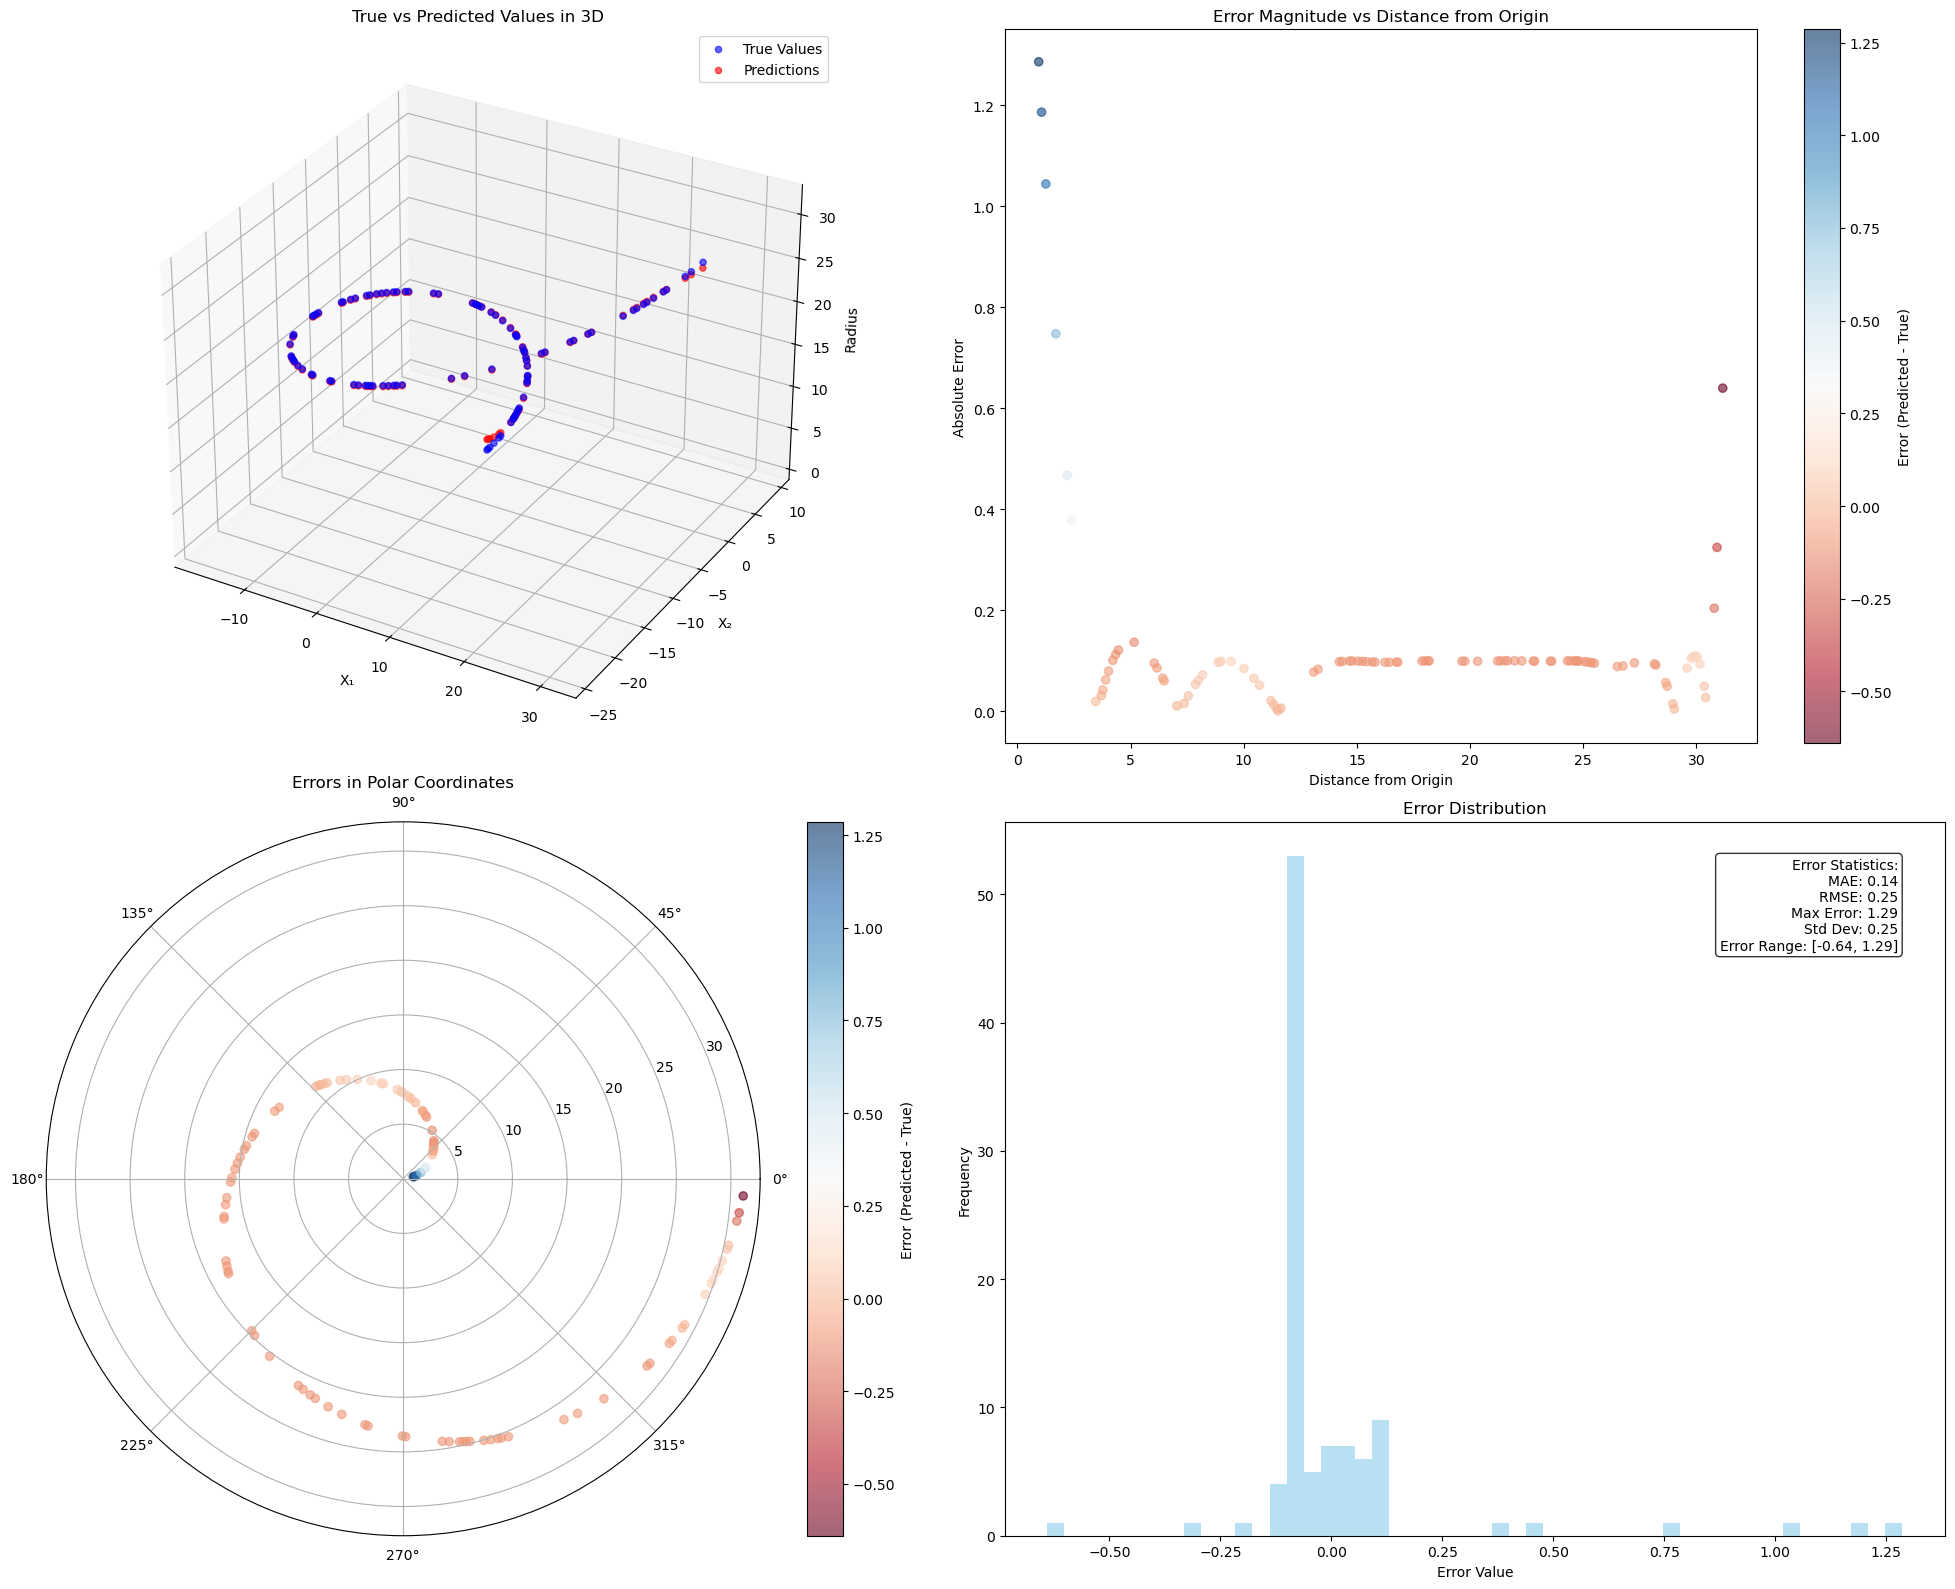

In [69]:
svr = SVR()
svr.fit(X_train, y_train)
y_pred = svr.predict(X_test)
plot_spiral_data(X_train, y_train, X_test, y_test, y_pred)
plot_spiral_errors(X_test, y_test, y_pred)
evaluate_regression(y_test, y_pred, "svr")

### SGD

In [70]:
from sklearn.linear_model import SGDRegressor


Performance Metrics for sgd:
--------------------------------------------------
R² Score: 0.5316
Explained Variance: 0.5357
Mean Absolute Error: 4.8646
Mean Squared Error: 40.0677
Root Mean Squared Error: 6.3299
Mean Absolute Percentage Error: 0.8084
Maximum Error: 17.6337


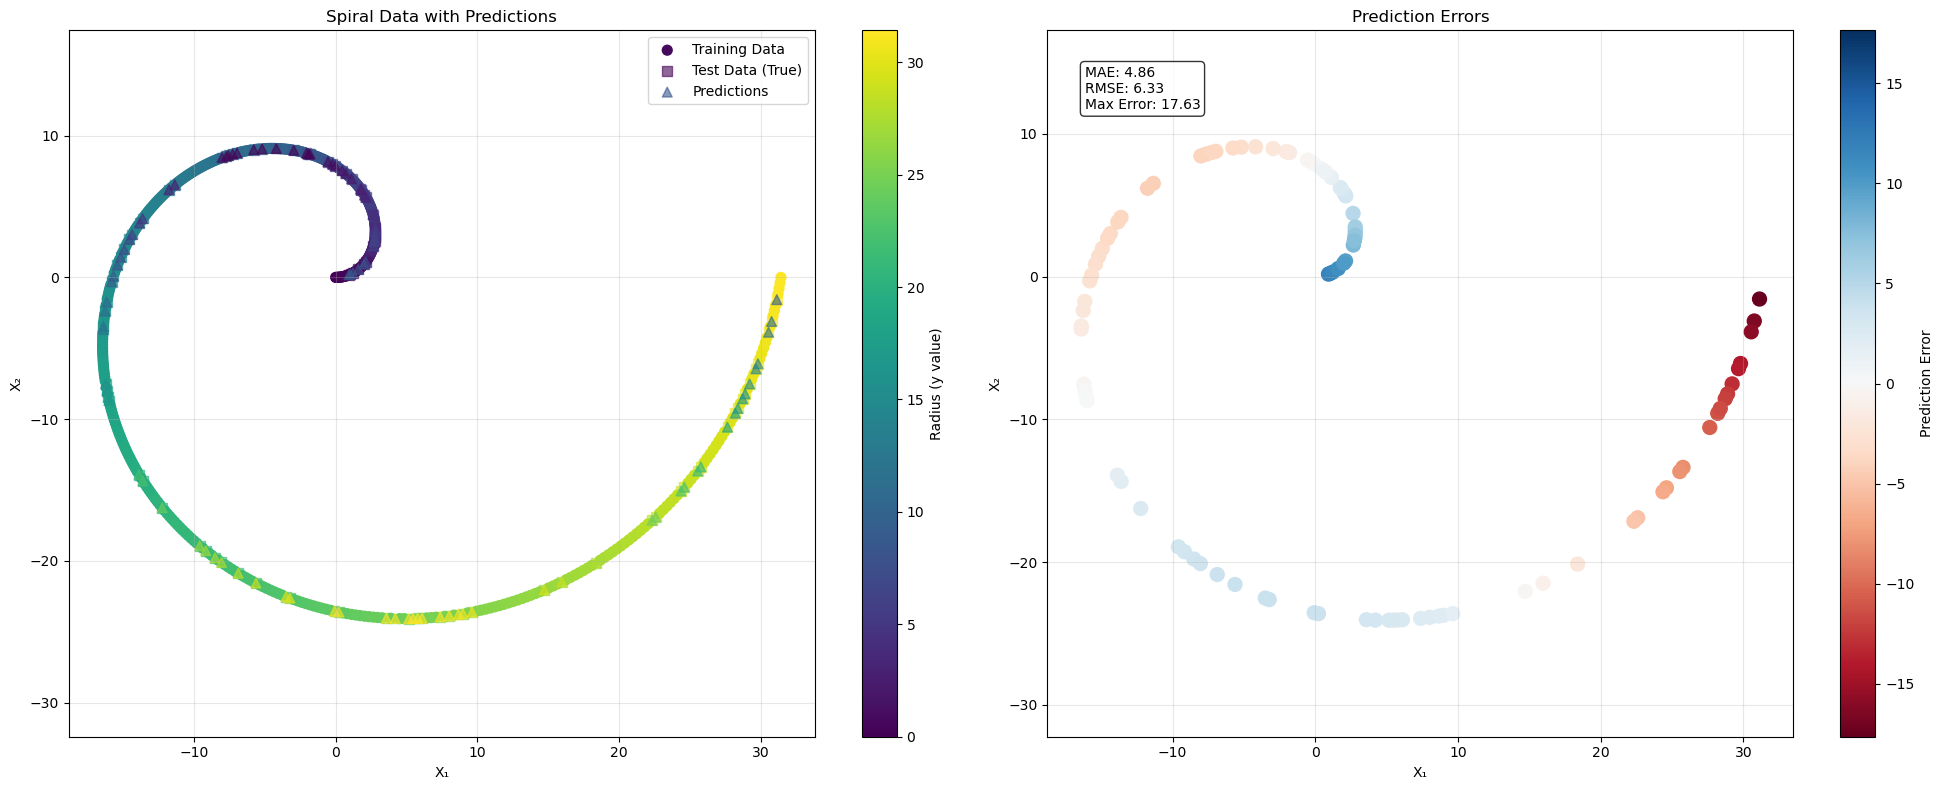

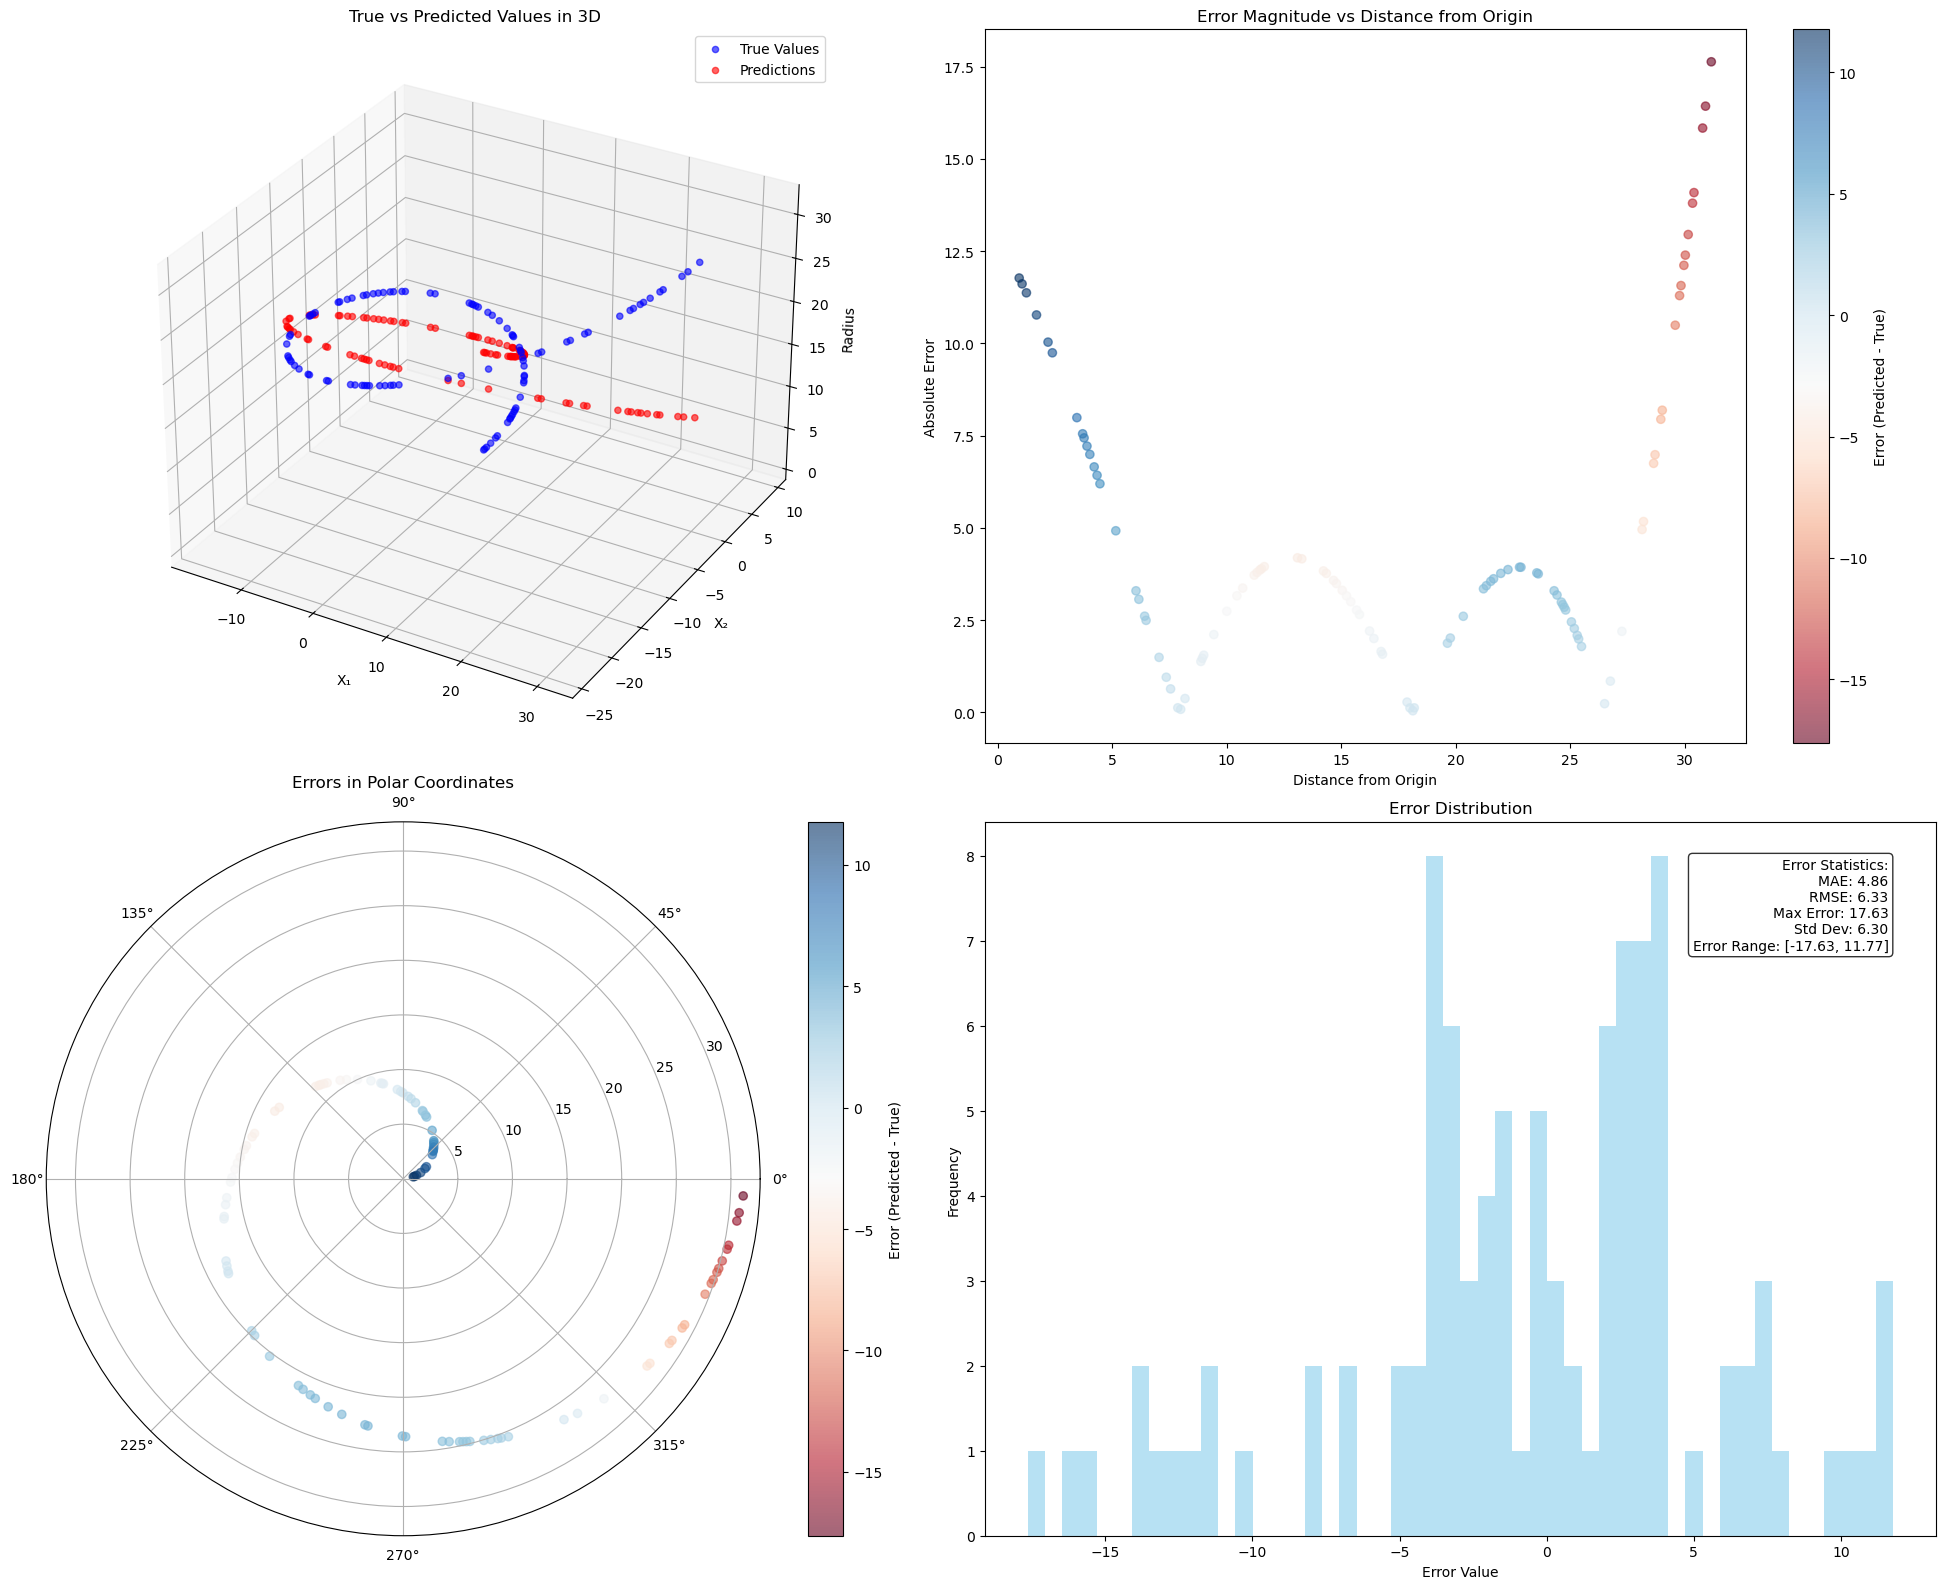

In [71]:
sgd = SGDRegressor()
sgd.fit(X_train, y_train)
y_pred = sgd.predict(X_test)
plot_spiral_data(X_train, y_train, X_test, y_test, y_pred)
plot_spiral_errors(X_test, y_test, y_pred)
evaluate_regression(y_test, y_pred, "sgd")

### Decision Tree

In [72]:
from sklearn.tree import DecisionTreeRegressor


Performance Metrics for dtr:
--------------------------------------------------
R² Score: 0.9999
Explained Variance: 0.9999
Mean Absolute Error: 0.0661
Mean Squared Error: 0.0046
Root Mean Squared Error: 0.0681
Mean Absolute Percentage Error: 0.0077
Maximum Error: 0.1889


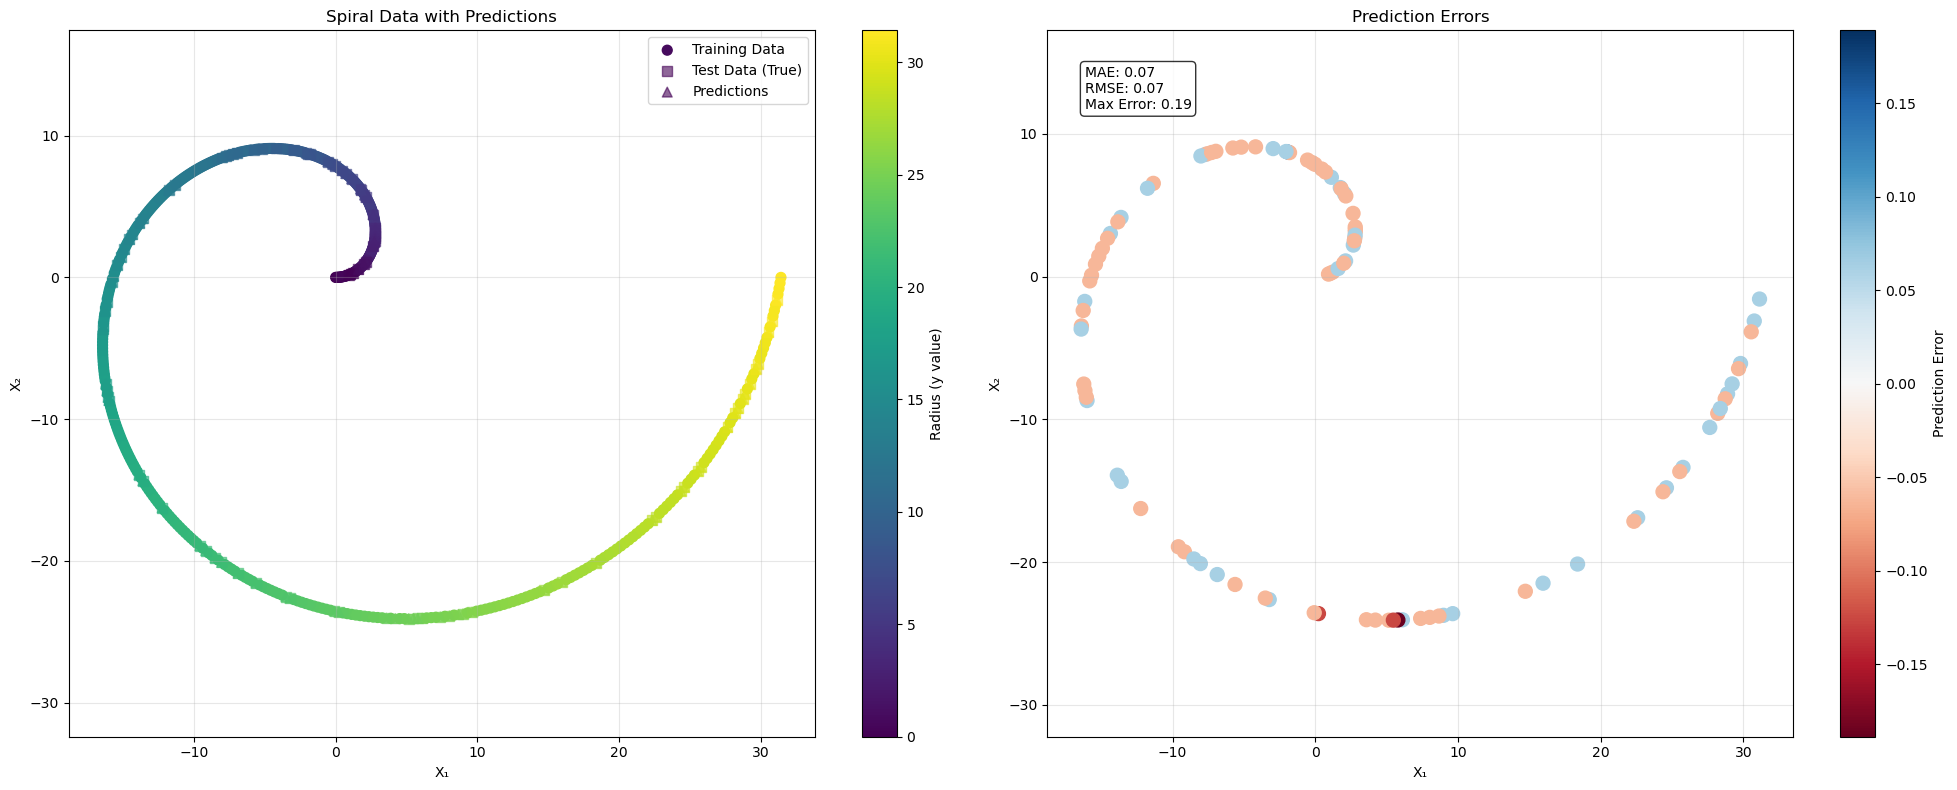

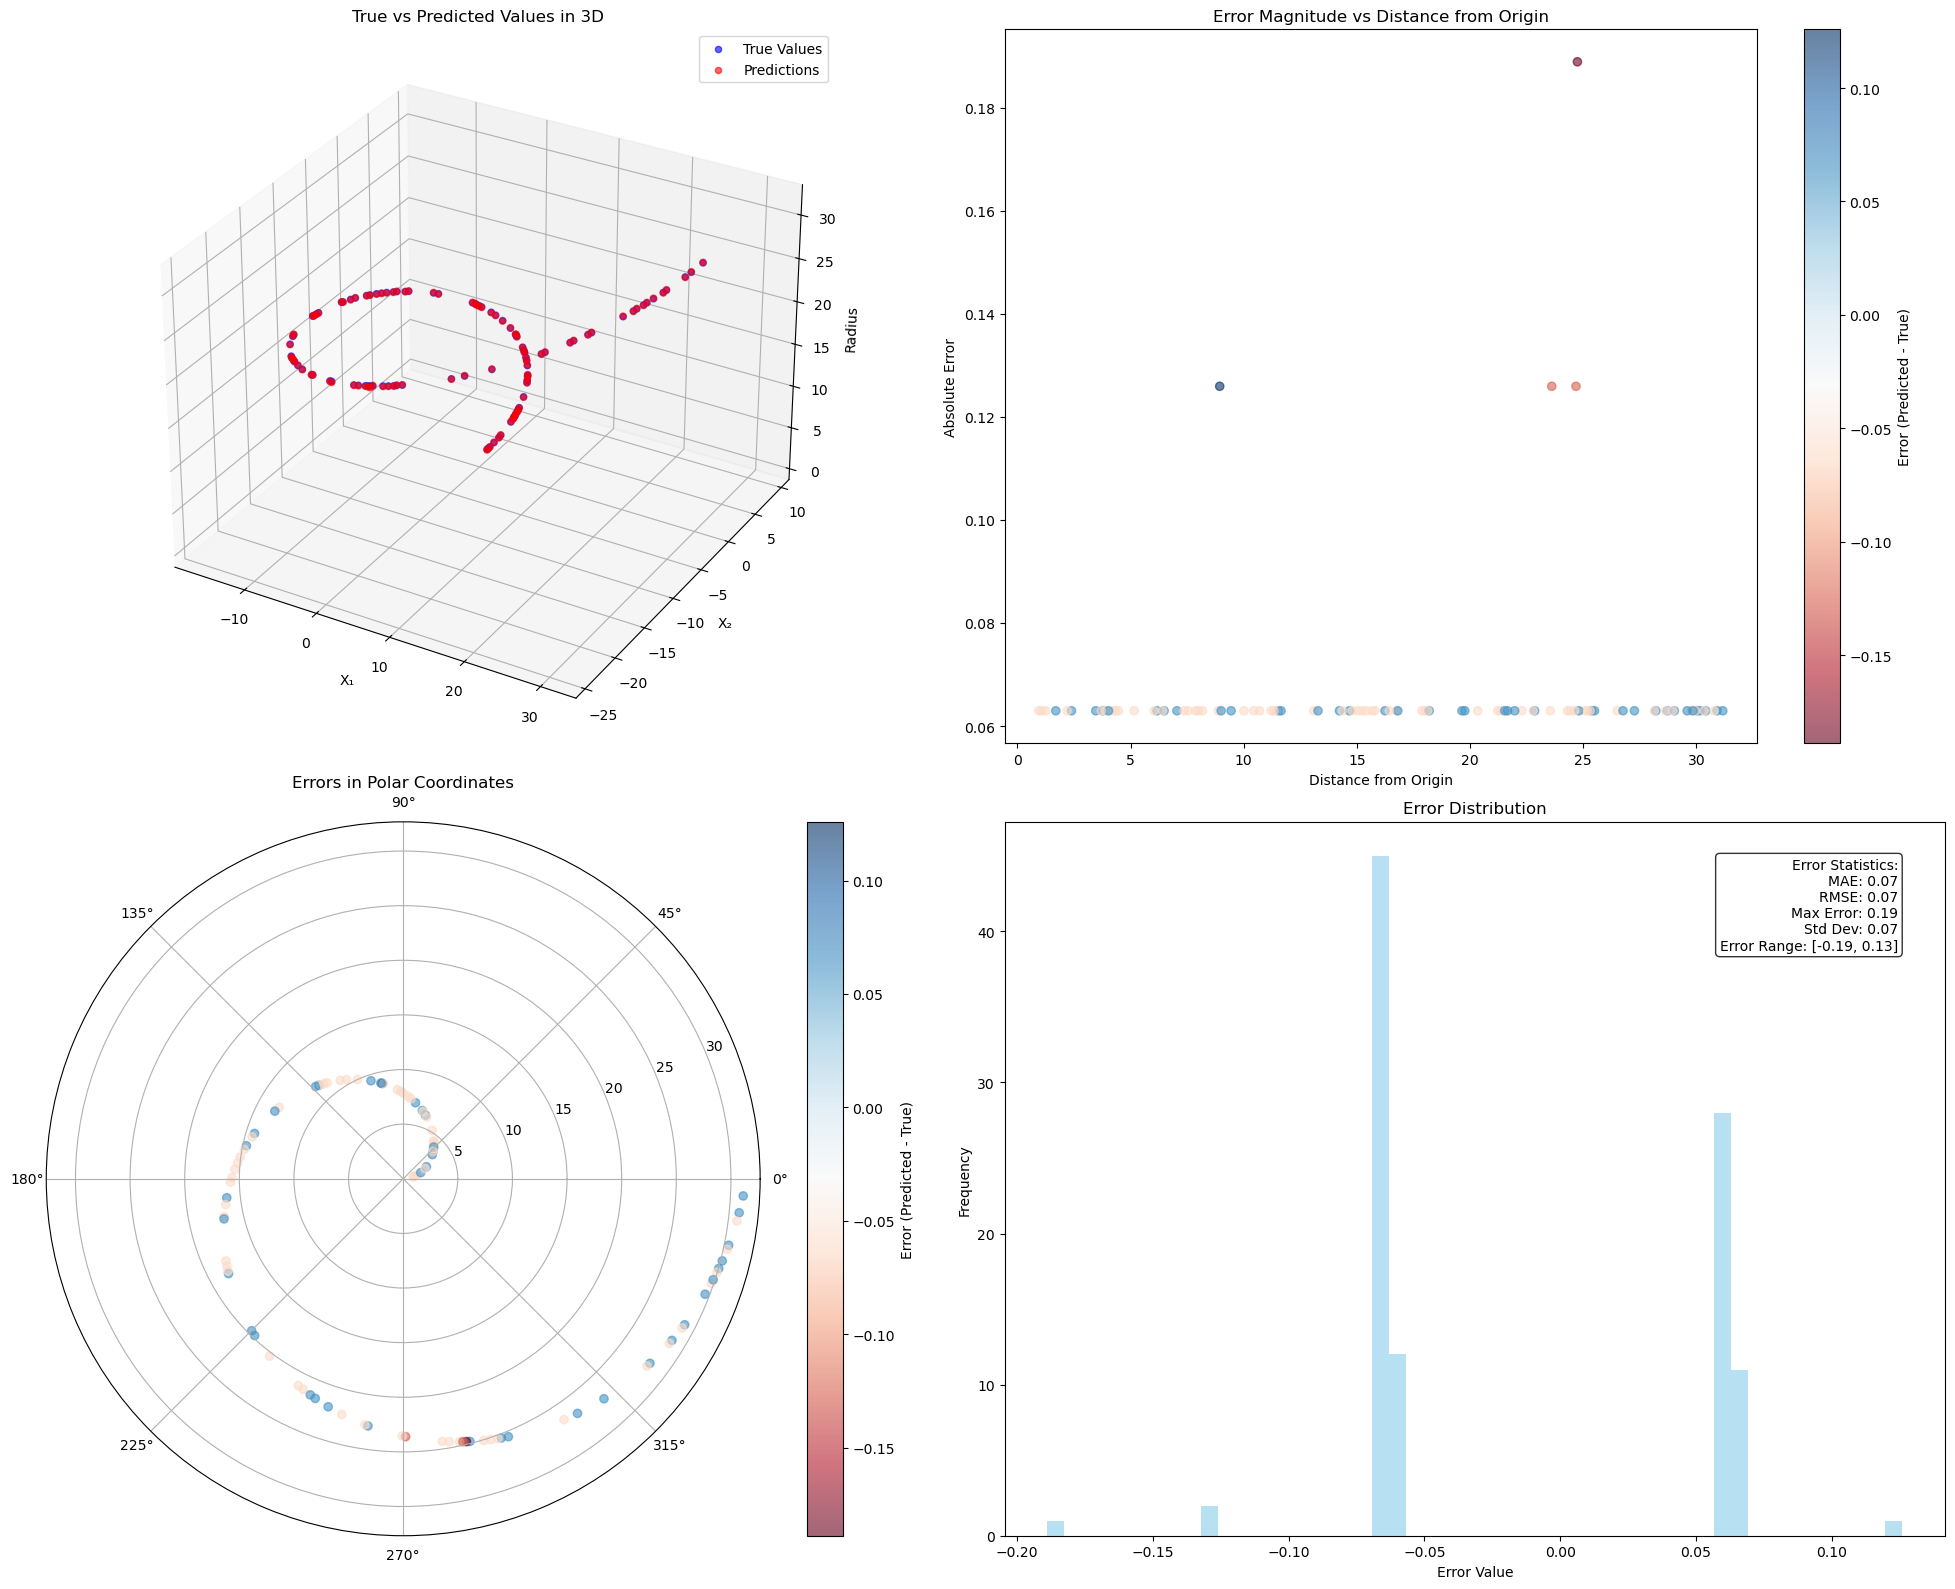

In [73]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)
y_pred = dtr.predict(X_test)
plot_spiral_data(X_train, y_train, X_test, y_test, y_pred)
plot_spiral_errors(X_test, y_test, y_pred)
evaluate_regression(y_test, y_pred, "dtr")

### Random Forest

In [75]:
from sklearn.ensemble import RandomForestRegressor


Performance Metrics for rfr:
--------------------------------------------------
R² Score: 0.9999
Explained Variance: 0.9999
Mean Absolute Error: 0.0384
Mean Squared Error: 0.0075
Root Mean Squared Error: 0.0867
Mean Absolute Percentage Error: 0.0031
Maximum Error: 0.5043


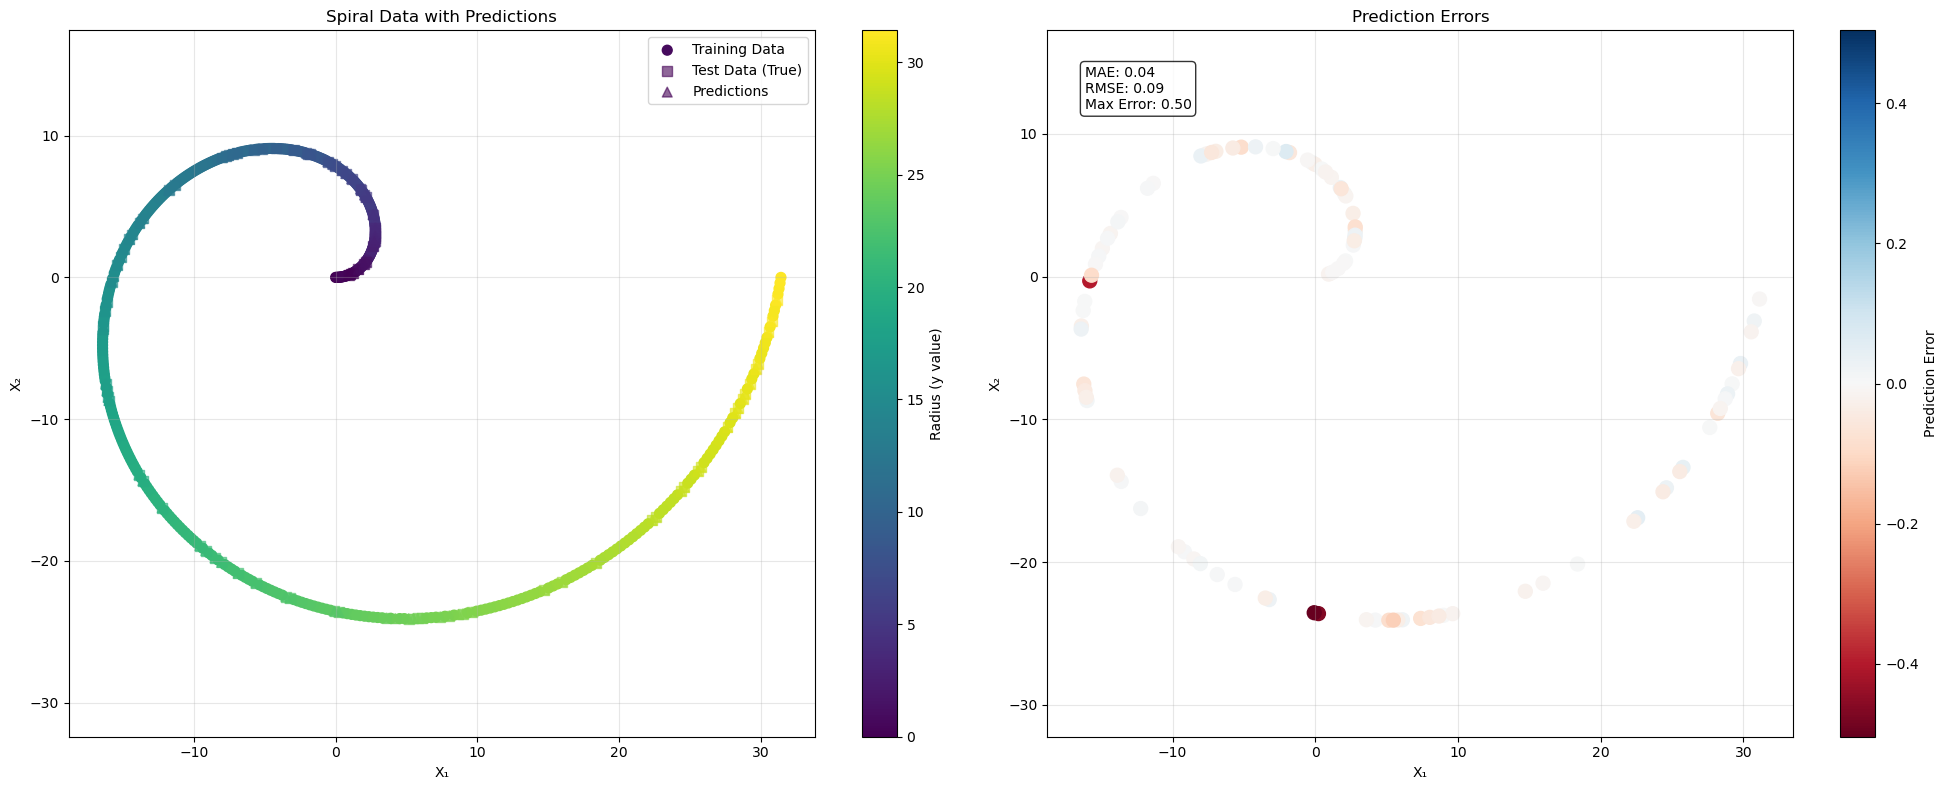

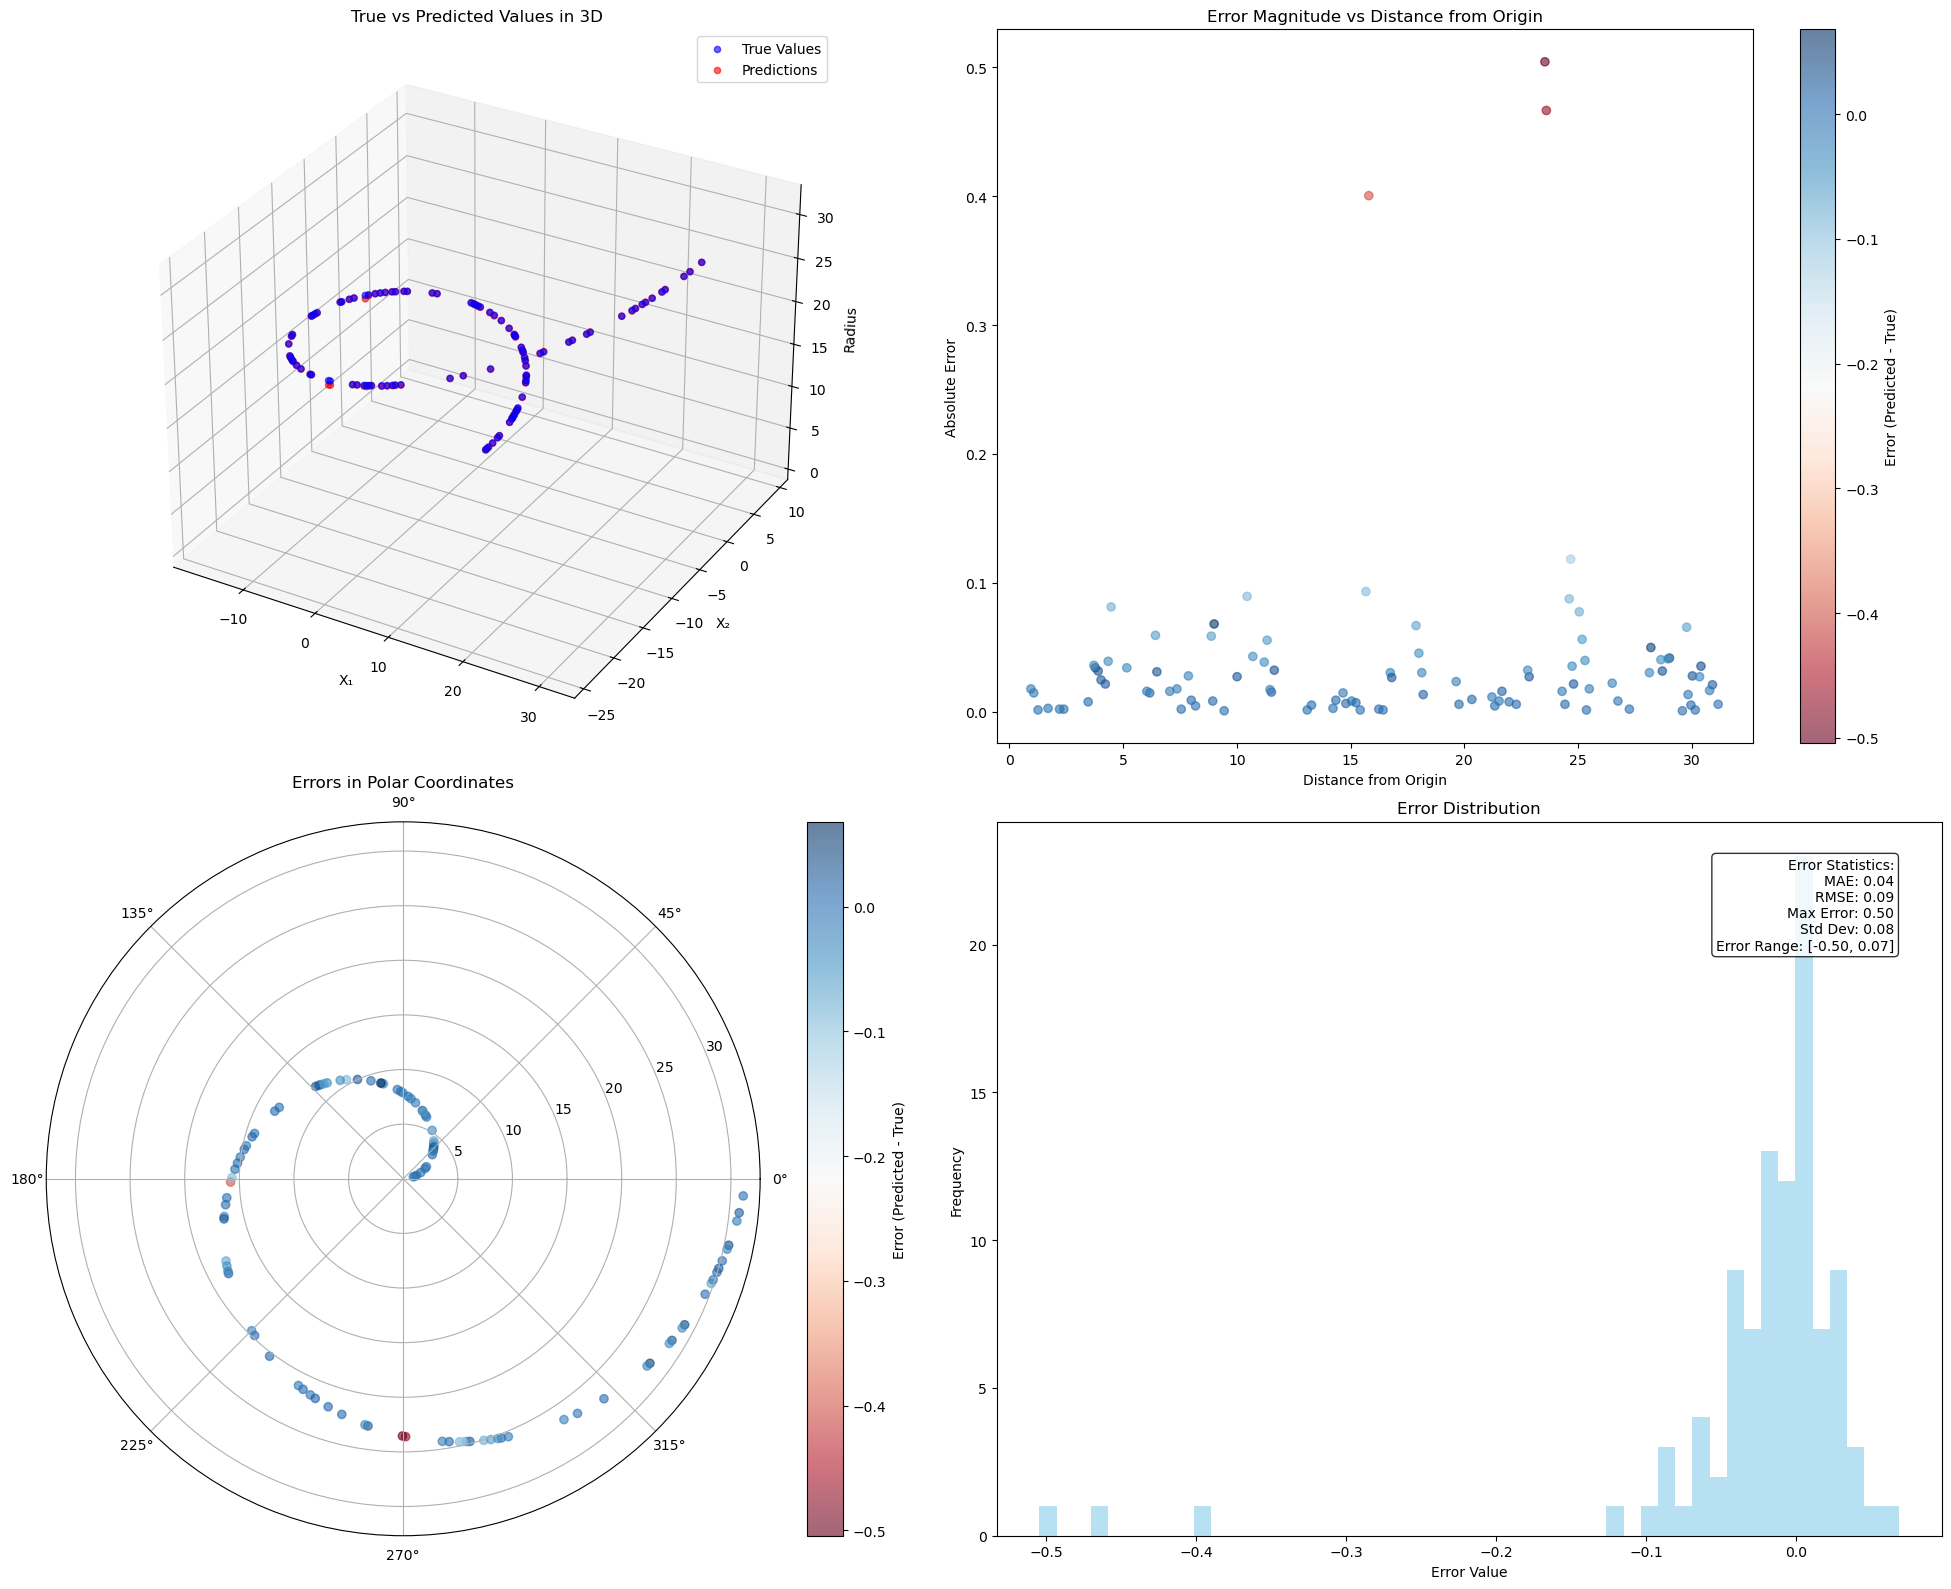

In [76]:
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)
y_pred = rfr.predict(X_test)
plot_spiral_data(X_train, y_train, X_test, y_test, y_pred)
plot_spiral_errors(X_test, y_test, y_pred)
evaluate_regression(y_test, y_pred, "rfr")